# 0. 분석 준비

## 0.1. 환경설정

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from geoband.API import *

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [5]:
# 한글폰트 설정
plt.rc("font", family="Malgun Gothic")
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['axes.unicode_minus'] = False

## 0.2. 데이터 불러오기

### 0.2.1. 제공 데이터 준비

In [6]:
import os
import shutil

# 현재 작업 폴더를 source_folder로 정의
source_folder = os.getcwd()

# 파일을 이동할 대상 폴더인 destination_folder를 설정
destination_folder = source_folder + '/input/compas/'

In [7]:
# 대상 폴더에 있는 모든 파일 목록 추출
files_in_destination = os.listdir(destination_folder)

# 각 확장자별로 파일을 분류할 딕셔너리 생성
file_categories = {}

# 파일을 각 확장자별로 분류
for file in files_in_destination:
    file_extension = os.path.splitext(file)[1].lower()
    if file_extension not in file_categories:
        file_categories[file_extension] = []
    file_categories[file_extension].append(file)

# 각 확장자별로 분류된 파일 목록 출력
for file_extension, files in file_categories.items():
    print(f"{file_extension}")
    for file in files:
        print(file)
    print()


.csv
1.청주시_거주인구.csv
2.청주시_성연령별_유동인구.csv
3.청주시_시간대별_유동인구.csv
4.청주시_요일별_유동인구.csv
5.청주시_유적지_문화재현황.csv
6.청주시_시장현황.csv
7.청주시_주차장현황.csv
8.청주시_공원현황.csv
9.청주시_폐공장현황.csv
10.청주시_버스정류장현황.csv
11.청주시_버스정류장_승하차이력.csv
12.청주시_추정교통량.csv
14.청주시_불법주정차단속통계.csv
18.청주시_상권정보.csv
19.청주시_카드매출_격자매핑.csv
20.청주시_112신고통계.csv
21.청주시_개별공시지가.csv
22.청주시_주민등록인구현황.csv
24.청주시_학교현황.csv
25.청주시_공공기관_및_주요지점현황.csv
28.청주시_어린이집_유치원현황.csv

.geojson
13.청주시_상세도로망.geojson
15.청주시_도로명주소(건물).geojson
16.청주시_도로명주소(도로).geojson
17.청주시_인도(보도).geojson
23.청주시_건물노후도.geojson
26.청주시_격자(매핑용).geojson
27.청주시_도시재생계획구역.geojson



In [8]:
dataframes = {}

# .csv와 .geojson 파일만 처리
for file_extension in ['.csv', '.geojson']:
    files = file_categories.get(file_extension, [])  # 해당 확장자의 파일 리스트 가져오기 (없으면 빈 리스트 반환)

    for file in files:
        prefix_found = None

        # '청주시_'로 시작하는 파일명 찾기
        for prefix in ['청주시_']:
            if prefix in file:
                prefix_found = prefix
                break

        if prefix_found:
            df_name = file.split(prefix_found)[1].split('.')[0].replace("(", "_").replace(")", "")
            
            # 파일의 절대 경로 생성
            file_path = os.path.join(destination_folder, file)
            
            # 확장자별로 적절한 방법으로 파일 불러오기
            if file_extension == '.csv':
                dataframes[df_name] = pd.read_csv(file_path)
            elif file_extension == '.geojson':
                dataframes[df_name] = gpd.read_file(file_path)
        else:
            print(f"예상치 못한 파일 구조: {file}")


In [9]:
from shapely.geometry import Point

# 위경도 데이터를 GeoDataFrame으로 전환
def convert_to_geodf(df_key, dataframes):
    data = dataframes[df_key]
    
    # lat, lon 열이 데이터프레임에 있는지 확인
    if 'lat' not in data.columns or 'lon' not in data.columns:
        print(f"'{df_key}'에 lat 또는 lon 열이 없습니다. 스킵합니다.")
        return None

    geometry = [Point(xy) for xy in zip(data.lon, data.lat)]
    geodf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")
    return geodf

# .csv 확장자를 가진 파일만 추출
csv_files = file_categories.get('.csv', [])

# .csv 확장자를 가진 파일명을 키로 사용하기 위해 파일명 앞부분만 추출
data_keys = ["_".join(os.path.splitext(file)[0].split('_')[1:]) for file in csv_files]

geodfs = {}

for key in data_keys:
    if key in dataframes:  # dataframes 딕셔너리에 해당 키가 있는지 확인
        geodf = convert_to_geodf(key, dataframes)
        if geodf is not None:  # 위경도 정보가 있는 데이터만 처리
            geodfs[key] = geodf
            print(geodfs[key].info())


'거주인구'에 lat 또는 lon 열이 없습니다. 스킵합니다.
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4077960 entries, 0 to 4077959
Data columns (total 16 columns):
 #   Column     Dtype   
---  ------     -----   
 0   STD_YM     int64   
 1   m_10g_pop  float64 
 2   m_20g_pop  float64 
 3   m_30g_pop  float64 
 4   m_40g_pop  float64 
 5   m_50g_pop  float64 
 6   m_60g_pop  float64 
 7   w_10g_pop  float64 
 8   w_20g_pop  float64 
 9   w_30g_pop  float64 
 10  w_40g_pop  float64 
 11  w_50g_pop  float64 
 12  w_60g_pop  float64 
 13  lon        float64 
 14  lat        float64 
 15  geometry   geometry
dtypes: float64(14), geometry(1), int64(1)
memory usage: 497.8 MB
None
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3988202 entries, 0 to 3988201
Data columns (total 28 columns):
 #   Column    Dtype   
---  ------    -----   
 0   STD_YM    int64   
 1   TMST_00   float64 
 2   TMST_01   float64 
 3   TMST_02   float64 
 4   TMST_03   float64 
 5   TMST_04   float64 
 6   TMST_

In [10]:
# 데이터 확인
index = 1
for df_name, df in dataframes.items():
    # df명 출력
    print(f"{index}. {df_name}")
    # head 출력
    display(df.head(3))
    index += 1
    print()
    print()
    print()

1. 거주인구


,gid,year,m_20g_pop,w_20g_pop,m_30g_pop,w_30g_pop,m_40g_pop,w_40g_pop,m_50g_pop,w_50g_pop,m_60g_pop,w_60g_pop,m_70g_pop,w_70g_pop,m_80g_pop,w_80g_pop,m_90g_pop,w_90g_pop,m_100g_pop,w_100g_pop
0,라바122456,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,다바841455,2021,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
2,라바189471,2021,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN





2. 성연령별_유동인구


,STD_YM,m_10g_pop,m_20g_pop,m_30g_pop,m_40g_pop,m_50g_pop,m_60g_pop,w_10g_pop,w_20g_pop,w_30g_pop,w_40g_pop,w_50g_pop,w_60g_pop,lon,lat,geometry
0,202001,0.02,0.04,0.06,0.06,0.10,0.15,0.0,0.04,0.04,0.04,0.12,0.08,127.50038,36.497170,POINT (127.50038 36.49717)
1,202001,0.00,0.02,0.04,0.06,0.09,0.08,0.0,0.02,0.04,0.06,0.08,0.06,127.50038,36.511144,POINT (127.50038 36.51114)
2,202001,0.02,0.04,0.04,0.09,0.18,0.13,0.0,0.04,0.06,0.08,0.10,0.11,127.50038,36.511594,POINT (127.50038 36.51159)





3. 시간대별_유동인구


,STD_YM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,TMST_07,TMST_08,...,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23,lon,lat,geometry
0,202001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.02,...,0.04,0.02,0.02,0.02,0.02,0.0,0.0,127.50038,36.497170,POINT (127.50038 36.49717)
1,202001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.02,...,0.04,0.02,0.02,0.02,0.00,0.0,0.0,127.50038,36.511144,POINT (127.50038 36.51114)
2,202001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.04,...,0.05,0.02,0.02,0.02,0.02,0.0,0.0,127.50038,36.511594,POINT (127.50038 36.51159)





4. 요일별_유동인구


,STD_YM,mon_pop,tue_pop,wed_pop,thu_pop,fri_pop,sat_pop,sun_pop,lon,lat,geometry
0,202001,0.57,0.44,0.64,0.55,0.65,1.08,1.22,127.50038,36.497170,POINT (127.50038 36.49717)
1,202001,0.02,0.02,0.00,0.02,0.02,0.00,0.00,127.50038,36.498973,POINT (127.50038 36.49897)
2,202001,0.02,0.02,0.00,0.02,0.02,0.00,0.00,127.50038,36.500325,POINT (127.50038 36.50033)





5. 유적지_문화재현황


,gbn,clt_nm,addr,lon,lat,geometry
0,국보,청주 용두사지 철당간,충청북도 청주시 상당구 남문로2가 48-19,127.489758,36.633095,POINT (127.48976 36.63309)
1,보물,청주 용화사 석조불상군,충청북도 청주시 서원구 사직동 216-1,127.482003,36.641779,POINT (127.48200 36.64178)
2,충북도 유형문화재,청주 충청도병마절도사영문,충청북도 청주시 상당구 남문로2가 92-6,127.488154,36.632669,POINT (127.48815 36.63267)





6. 시장현황


,market_nm,addr,area,lon,lat,geometry
0,육거리종합시장,상당구 청남로2197번길 42(석교동),86273,127.488184,36.627938,POINT (127.48818 36.62794)
1,서문시장,상당구 남사로89번길 57(서문동),10285,127.485365,36.634894,POINT (127.48536 36.63489)
2,중앙시장,상당구 중앙로 26(북문로2가),7305,127.489192,36.639385,POINT (127.48919 36.63938)





7. 주차장현황


,carpark_nm,carpark_type,addr,slots,lon,lat,geometry
0,청주랜드 동물원,노상,충청북도 청주시 상당구 명암로 171,255,127.515747,36.650530,POINT (127.51575 36.65053)
1,상공회의소,노상,충청북도 청주시 상당구 상당로 102,25,127.490487,36.637486,POINT (127.49049 36.63749)
2,명문식당,노상,충청북도 청주시 상당구 우암산로4,30,127.490514,36.639075,POINT (127.49051 36.63908)





8. 공원현황


,park_gbn,park_nm,lon,lat,geometry
0,근린공원,금천배수지,127.513111,36.626271,POINT (127.51311 36.62627)
1,어린이공원,사랑,127.509585,36.629404,POINT (127.50959 36.62940)
2,어린이공원,늘푸름,127.511073,36.625867,POINT (127.51107 36.62587)





9. 폐공장현황


,addr,reg_dt,site_area,mnfac_area,addfac_area,cncl_dt,cncl_resn,lon,lat,geometry
0,충청북도 청주시 서원구 현도면 시목외천로 381,20200527,1029.00,409.83,83.71,20210702,이전에의한폐업,127.414516,36.522164,POINT (127.41452 36.52216)
1,"충청북도 청주시 청원구 율천남로 92, 1층 (내덕동)",20200226,273.00,132.09,0.00,20230222,이전에의한폐업,127.481527,36.662701,POINT (127.48153 36.66270)
2,충청북도 청주시 서원구 현도면 죽암도원로 12-28,20191025,305.22,155.20,150.02,20210913,이전에의한폐업,127.432720,36.520385,POINT (127.43272 36.52039)





10. 버스정류장현황


,bis_id,stn_nm,lon,lat,geometry
0,4391461,기점,127.47443,36.64312,POINT (127.47443 36.64312)
1,4391471,회차점,127.47763,36.64462,POINT (127.47763 36.64462)
2,4391481,종점,127.47637,36.64430,POINT (127.47637 36.64430)





11. 버스정류장_승하차이력


,use_date,use_time,line_id,line_nm,bis_id,stn_nm,gnrl_use,stdnt_use,chld_use,othr_use,board_gbn
0,20230601,55953,43015161,711,4369951,청주역,1,0,0,0,일반승차
1,20230601,55955,43015161,711,4369951,청주역,1,0,0,0,일반승차
2,20230601,55957,43015161,711,4369951,청주역,1,0,0,0,일반승차





12. 추정교통량


,year,link_id,road_rank,road_length,road_nm,sido_nm,sgg_nm,emd_nm,timeslot,ALL_AADT,PSCR_AADT,BUS_AADT,FGCR_AADT
0,2019,90000005501,107,0.327926,NaN,충청북도,청주시 서원구,현도면,all,1198,136,24,1038
1,2019,90000005502,107,0.327926,NaN,충청북도,청주시 서원구,현도면,all,1531,126,24,1381
2,2019,90000007001,107,0.341045,NaN,충청북도,청주시 서원구,현도면,all,1076,126,24,925





13. 불법주정차단속통계


,cd_type,cd_loc,cd_dong,cd_cnt,lon,lat,geometry
0,고정형,상당로 남궁요양병원사거리부근1,문화동,13,127.490864,36.632164,POINT (127.49086 36.63216)
1,고정형,사직대로 대현지하상가나도약국부근,북문로1가,15,127.487698,36.636797,POINT (127.48770 36.63680)
2,고정형,사직대로 지하상가성안길입구부근,북문로2가,17,127.488849,36.636973,POINT (127.48885 36.63697)





14. 상권정보


,com_lc_cd,com_lc_nm,com_mc_cd,com_mc_nm,com_sc_cd,com_sc_nm,ksic_cd,ksic_nm,adb_emd_cd,adb_emd_nm,road_address,lon,lat,geometry
0,R,학문/교육,R04,학원-어학,R04A01,학원-외국어/어학,P85502,외국어학원,4311259000,성화.개신.죽림동,"충청북도 청주시 서원구 복대로 7, (개신동)",127.446061,36.617928,POINT (127.44606 36.61793)
1,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,4311154500,성안동,"충청북도 청주시 상당구 대성로 38, (서운동)",127.493371,36.628602,POINT (127.49337 36.62860)
2,D,소매,D07,가정/주방/인테리어,D07A15,유리/페인트/철물건축자재,G47519,"페인트, 유리 및 기타 건설자재 소매업",4311257000,수곡1동,"충청북도 청주시 서원구 매봉로 64, (수곡동, 산남주공3차)",127.478662,36.616083,POINT (127.47866 36.61608)





15. 카드매출_격자매핑


,stdr_ym,kbc_bzc_nm_1,kbc_bzc_nm_2,kbc_bzc_nm_3,card_sales,est_sales,gid
0,202305,서비스,(정기)납부/대여서비스,미디어/음향,989000,18995.0,다바989487
1,202305,서비스,(정기)납부/대여서비스,도서/음반대여,54000,844.0,다바989487
2,202305,서비스,의료서비스,한의원,5019200,83333.0,다바992490





16. 112신고통계


,gid,repo_2018,repo_2019,repo_2020,repo_2021,repo_2022
0,라바122456,1.0,0.0,0.0,0.0,0.0
1,다바841455,1.0,1.0,0.0,0.0,0.0
2,라바189471,0.0,0.0,0.0,0.0,0.0





17. 개별공시지가


,unique_no,bjd_cd,bjd_nm,s_land_nm,jibun,year,month,land_value,st_gbn
0,4311110100100010001,4311110100,충청북도 청주시 상당구영동,일반,1-1,2017,1,231000,N
1,4311110100100010001,4311110100,충청북도 청주시 상당구영동,일반,1-1,2018,1,240900,N
2,4311110100100010001,4311110100,충청북도 청주시 상당구영동,일반,1-1,2019,1,264000,N





18. 주민등록인구현황


,adm_cd,adm_nm,year,m_pop,fm_pop
0,4311131000,충청북도 청주시 상당구 낭성면,201701,1232,1140
1,4311132000,충청북도 청주시 상당구 미원면,201701,2757,2636
2,4311133000,충청북도 청주시 상당구 가덕면,201701,2259,2066





19. 학교현황


,school_nm,estab_gbn,school_chtr,addr,lon,lat,geometry
0,금천고등학교,공립,일반고등학교,충청북도 청주시 상당구 호미로233번길 65 금천고등학교 (금천동),127.511943,36.627797,POINT (127.51194 36.62780)
1,대성여자상업고등학교,사립,특성화고등학교,충청북도 청주시 상당구 대성로 220(수동),127.492313,36.645357,POINT (127.49231 36.64536)
2,충북에너지고등학교,공립,특수목적고등학교,충청북도 청주시 상당구 미원면 미원초정로 27(미원면),127.657148,36.639802,POINT (127.65715 36.63980)





20. 공공기관_및_주요지점현황


,inst_gbn,inst_nm,lon,lat,geometry
0,시군청,청주시 상당보건소,127.492925,36.641236,POINT (127.49293 36.64124)
1,시군청,청주 흥덕경찰서,127.454965,36.656568,POINT (127.45496 36.65657)
2,시군청,청주 동부소방서,127.494864,36.620987,POINT (127.49486 36.62099)





21. 어린이집_유치원현황


,fac_nm,fxd_num,prsnt_num,lon,lat,geometry
0,행정초등학교병설유치원,17,5,127.531947,36.536620,POINT (127.53195 36.53662)
1,남일초등학교병설유치원,17,10,127.509473,36.575787,POINT (127.50947 36.57579)
2,청남어린이집,89,41,127.512457,36.576130,POINT (127.51246 36.57613)





22. 상세도로망


,link_id,max_speed,road_name,road_no,road_rank,link_type,pavement,road_type,facil_name,up_lanes,dw_lanes,oneway,length,up_its_id,dw_its_id,geometry
0,563301129,30,궁현연꽃2길,0,107,32768,0,0,None,1,1,0,0.416,2710577300,2710577400,"LINESTRING (127.36457 36.58015, 127.36491 36.5..."
1,563301201,60,저산궁현길,0,107,32768,0,0,None,1,1,0,2.035,2710575200,2710575100,"LINESTRING (127.36457 36.58015, 127.36448 36.5..."
2,563302088,60,서부로,594,106,32768,0,0,None,1,1,0,0.400,2710578500,2710578600,"LINESTRING (127.36895 36.58374, 127.36873 36.5..."





23. 도로명주소_건물


,BUL_MAN_NO,SIG_CD,RN_CD,RDS_MAN_NO,BSI_INT_SN,EQB_MAN_SN,BULD_SE_CD,BULD_MNNM,BULD_SLNO,BULD_NM,...,MVM_RES_CD,MVMN_RESN,MVMN_DE,OPERT_DE,BSI_ZON_NO,BD_MGT_SN,GRO_FLO_CO,UND_FLO_CO,RDS_SIG_CD,geometry
0,189487,43113,3014066,36522,610021,0,0,411,63,None,...,51,관련지번변경,20160711,20161121132852,28174,4311331027200100001000001,1.0,0.0,43113,"POLYGON ((127.36472 36.59165, 127.36453 36.591..."
1,189488,43113,4511417,24841,472729,0,0,11,0,None,...,71,RASS건물도형갱신,20160711,20160729154307,28561,4311311500109800001000001,4.0,0.0,43113,"POLYGON ((127.46487 36.64026, 127.46487 36.640..."
2,366897,43112,4520512,2063,54244,0,0,25,18,None,...,31,None,20230531,20230531143152,28214,4311232024104830000000001,1.0,0.0,43112,"POLYGON ((127.43130 36.50196, 127.43129 36.501..."





24. 도로명주소_도로


,SIG_CD,RDS_MAN_NO,RN,RN_CD,ENG_RN,NTFC_DE,WDR_RD_CD,ROA_CLS_SE,RDS_DPN_SE,RBP_CN,...,ROAD_BT,ROAD_LT,BSI_INT,ALWNC_RESN,ALWNC_DE,MVM_RES_CD,MVMN_RESN,MVMN_DE,OPERT_DE,geometry
0,43110,48962,서부로,3014066,Seobu-ro,20100423,1,3,1,현암동 6-2,...,4.0,497.510,20,청주시 서쪽에서 진입하는 도로,20100423,12,도로구간변경,20100423,20220428152317,"LINESTRING (127.40047 36.59407, 127.40049 36.5..."
1,43114,37882,오창가좌4길,4520481,Ochanggajwa 4-gil,20090506,3,4,1,오창읍 가좌리 577-0,...,3.0,230.829,20,행정구역명(오창 가좌)을 이용하여 오창가좌4길로 부여,20090506,12,None,20170426,20170426170627,"LINESTRING (127.37871 36.74003, 127.37869 36.7..."
2,43114,45102,오창대로,2014001,Ochang-daero,20090717,3,2,1,오창읍 농소리 산15-3,...,6.0,172.150,20,청원구 오창 중심도로로 청주국제 공항을 연결하는 도로,20090717,12,도로구간변경,20191126,20191126165702,"LINESTRING (127.44062 36.70666, 127.44062 36.7..."





25. 인도_보도


,UFID,QUAL,BYYN,KIND,geometry
0,100036706005A00317ac9293140644fe9,미분류,무,인도,"LINESTRING (127.36695 36.73375, 127.36710 36.7..."
1,100036706017A003158212dfea9cb45a3,미분류,무,인도,"LINESTRING (127.42075 36.70644, 127.42081 36.7..."
2,100036706019A00316897f36b559b40cb,미분류,무,인도,"LINESTRING (127.46556 36.72276, 127.46623 36.7..."





26. 건물노후도


,pnu,emd_nm,bld_nm,dong_nm,gfa,strct_nm,usage_nm,useapr_day,old_year,geometry
0,4311110100100020001,충청북도 청주시 상당구영동,None,None,145.26,벽돌구조,단독주택,1978-01-20,46.0,"MULTIPOLYGON (((127.48672 36.64492, 127.48673 ..."
1,4311110100100020002,충청북도 청주시 상당구영동,None,None,92.43,경량철골구조,단독주택,2011-04-12,13.0,"MULTIPOLYGON (((127.48645 36.64485, 127.48657 ..."
2,4311110100100020003,충청북도 청주시 상당구영동,None,주2,173.13,경량철골구조,제2종근린생활시설,2011-09-14,13.0,"MULTIPOLYGON (((127.48627 36.64489, 127.48641 ..."





27. 격자_매핑용


,gid,geometry
0,라바122456,"POLYGON ((127.63642 36.60817, 127.63642 36.609..."
1,다바841455,"POLYGON ((127.32221 36.60721, 127.32221 36.608..."
2,라바189471,"POLYGON ((127.71137 36.62158, 127.71138 36.622..."





28. 도시재생계획구역


,fid,구역명,geometry
0,5,도시재생구역도,"POLYGON ((127.48334 36.63186, 127.48334 36.631..."


### 0.2.2. 추가 데이터 업로드 및 준비

In [11]:
# import zipfile
# import os

# path = '/opt/app-root/src/07 (LH) 청주시 원도심 활성화 전략 수립을 위한 빅데이터 시각화/input/'

# # 해당 경로의 모든 파일을 확인
# for file_name in os.listdir(path):
#     if file_name.endswith('.zip'): # ZIP 파일인 경우
#         file_path = os.path.join(path, file_name)
        
#         # 압축을 해제할 하위 폴더 생성 (파일 확장자 제거)
#         extract_folder = os.path.join(path, os.path.splitext(file_name)[0])
#         os.makedirs(extract_folder, exist_ok=True)

#         # 압축 해제
#         with zipfile.ZipFile(file_path, 'r') as zip_ref:
#             zip_ref.extractall(extract_folder)
#             print(f'{file_name}을(를) {extract_folder}에 해제 완료')

#         # ZIP 파일 삭제
#         os.remove(file_path)
#         print(f'{file_name} 삭제 완료!')


## 0.3. 분석 대상지역 준비

### 0.3.1. 도시재생계획구역 경계

In [12]:
study_area = dataframes['도시재생계획구역'].copy()
study_area.drop(columns=['fid', '구역명'], inplace=True)
study_area

,geometry
0,"POLYGON ((127.48334 36.63186, 127.48334 36.631..."


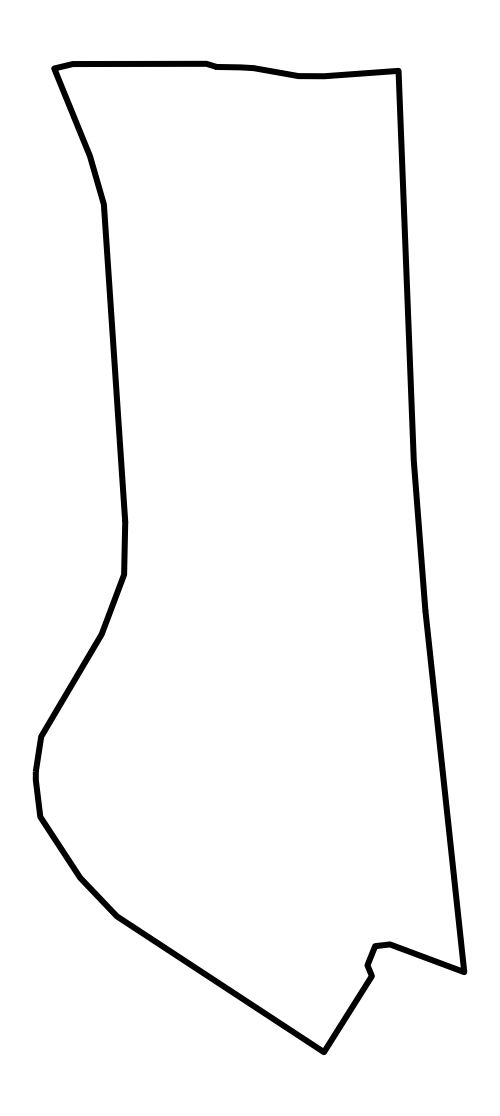

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')

# plot
study_area.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=3)

plt.show()

### 0.3.2. 현황 데이터 준비(clip)

#### (1) 격자

In [14]:
# 격자 데이터 준비
grid = dataframes['격자_매핑용'].copy()

# 각 격자의 중심점 계산
grid['centroid'] = grid['geometry'].centroid

# 중심점이 study_area 안에 있는 격자만 필터링
study_grid = grid[grid['centroid'].within(study_area.geometry.iloc[0])].drop(columns=['centroid'])

study_grid.head()

,gid,geometry
86,다바993480,"POLYGON ((127.49217 36.62988, 127.49217 36.630..."
212,다바986484,"POLYGON ((127.48434 36.63348, 127.48434 36.634..."
289,다바993479,"POLYGON ((127.49217 36.62898, 127.49217 36.629..."
438,다바992492,"POLYGON ((127.49105 36.64070, 127.49105 36.641..."
605,다바987485,"POLYGON ((127.48546 36.63439, 127.48546 36.635..."


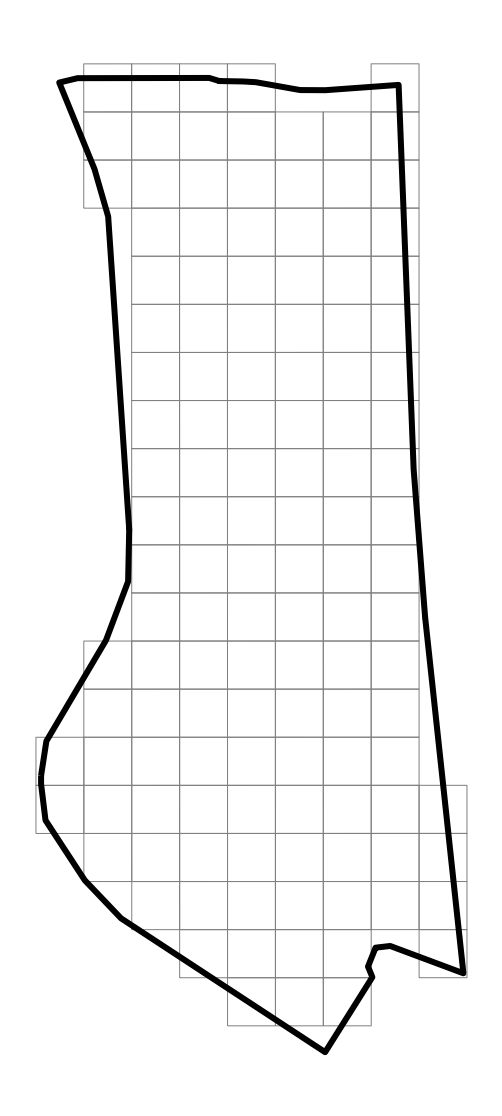

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')

# plot
study_grid.plot(ax=ax, facecolor='none', edgecolor='grey', linewidth=0.5)
study_area.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=3)

plt.show()

#### (2) 도로

In [16]:
df_road = dataframes['도로명주소_도로'].copy()

# clip
df_road = gpd.clip(df_road, study_area)

df_road.head()

,SIG_CD,RDS_MAN_NO,RN,RN_CD,ENG_RN,NTFC_DE,WDR_RD_CD,ROA_CLS_SE,RDS_DPN_SE,RBP_CN,...,ROAD_BT,ROAD_LT,BSI_INT,ALWNC_RESN,ALWNC_DE,MVM_RES_CD,MVMN_RESN,MVMN_DE,OPERT_DE,geometry
31,43111,22199,무심동로328번길,4508237,Musimdong-ro 328beon-gil,20100205,3,4,0,남주동 637-1,...,6.0,95.0,10,"무심동로의 시작지점에서부터 약 3,280m지점에서 오른쪽으로 분기되는 도로",20100205,90,"광역도로 정비 및 부여사유, 부여방식 정비",20141030,20141030224130,"LINESTRING (127.48402 36.63032, 127.48403 36.6..."
125,43111,23026,상당로55번길,4508329,Sangdang-ro 55beon-gil,20100205,3,4,1,문화동 104-13,...,4.0,40.0,10,상당로의 시작지점에서부터 약 550m지점에서 왼쪽으로 분기되는 도로,20100205,90,"광역도로 정비 및 부여사유, 부여방식 정비",20141030,20141030224133,"LINESTRING (127.48853 36.63293, 127.48853 36.6..."
289,43111,22100,무심동로392번길,4508242,Musimdong-ro 392beon-gil,20100205,3,4,0,서문동 162,...,12.0,150.0,10,"무심동로의 시작지점에서부터 약 3,920m지점에서 오른쪽으로 분기되는 도로",20100205,90,"광역도로 정비 및 부여사유, 부여방식 정비",20141030,20141030224130,"LINESTRING (127.48538 36.63559, 127.48555 36.6..."
318,43111,23043,사직대로,3236025,Sajik-daero,20100205,3,2,1,복대동 966-0,...,5.0,3850.0,10,"옛 사직단의 위치해 있음을 인용하고 청주의 상징적 의미의 ""대로""반영",20100205,99,직권수정(속성변경),20141030,20161005094910,"LINESTRING (127.48836 36.63692, 127.48835 36.6..."
365,43111,21895,대성로165번길,4508179,Daeseong-ro 165beon-gil,20100205,3,4,0,수동 457,...,3.0,128.0,10,"대성로의 시작지점에서부터 약 1,650m지점에서 왼쪽으로 분기되는 도로",20100205,90,"광역도로 정비 및 부여사유, 부여방식 정비",20141030,20141030224128,"LINESTRING (127.49192 36.64007, 127.49062 36.6..."


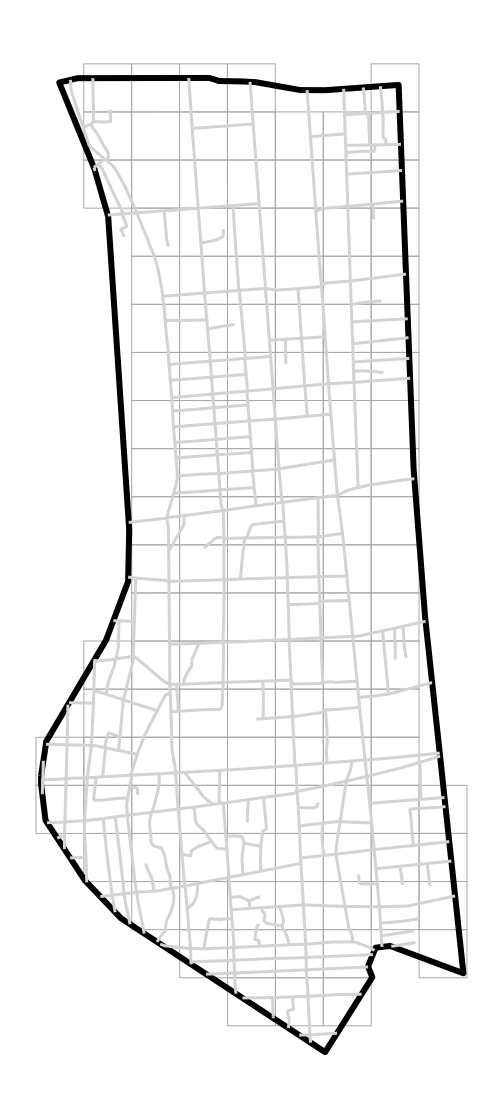

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')

# plot
df_road.plot(ax=ax, facecolor='none', edgecolor='lightgrey', linewidth=1.5)
study_grid.plot(ax=ax, facecolor='none', edgecolor='darkgrey', linewidth=0.5)
study_area.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=3)

plt.show()

#### (3) 건축물

In [18]:
df_building = dataframes['도로명주소_건물'].copy()

# clip
df_building = gpd.clip(df_building, study_area)

df_building.head()

,BUL_MAN_NO,SIG_CD,RN_CD,RDS_MAN_NO,BSI_INT_SN,EQB_MAN_SN,BULD_SE_CD,BULD_MNNM,BULD_SLNO,BULD_NM,...,MVM_RES_CD,MVMN_RESN,MVMN_DE,OPERT_DE,BSI_ZON_NO,BD_MGT_SN,GRO_FLO_CO,UND_FLO_CO,RDS_SIG_CD,geometry
1036,101214,43111,3236004,22189,418327,31830,0,38,0,평화아파트,...,71,기재내용정정,None,20170915135000,28544,4311110100100600000061755,5.0,0.0,43111,"POLYGON ((127.48694 36.63999, 127.48644 36.639..."
1037,123221,43111,3236004,23633,436269,0,0,40,1,None,...,71,기재내용정정,None,20170915135000,28544,4311110100100550002032236,1.0,0.0,43111,"POLYGON ((127.48633 36.64058, 127.48644 36.640..."
1038,123223,43111,3236004,23633,436267,40834,0,40,5,None,...,71,기재내용정정,None,20170915135000,28544,4311110100100560003032233,2.0,0.0,43111,"POLYGON ((127.48646 36.64054, 127.48646 36.640..."
1039,123224,43111,3236004,23633,436267,40834,0,40,5,None,...,71,기재내용정정,None,20170915135000,28544,4311110100100560003071386,1.0,0.0,43111,"POLYGON ((127.48646 36.64042, 127.48646 36.640..."
1040,123222,43111,3236004,23633,436266,0,0,40,7,None,...,79,건물용도변경,20201114,20201114111548,28544,4311110100100560002032235,3.0,0.0,43111,"POLYGON ((127.48656 36.64061, 127.48670 36.640..."


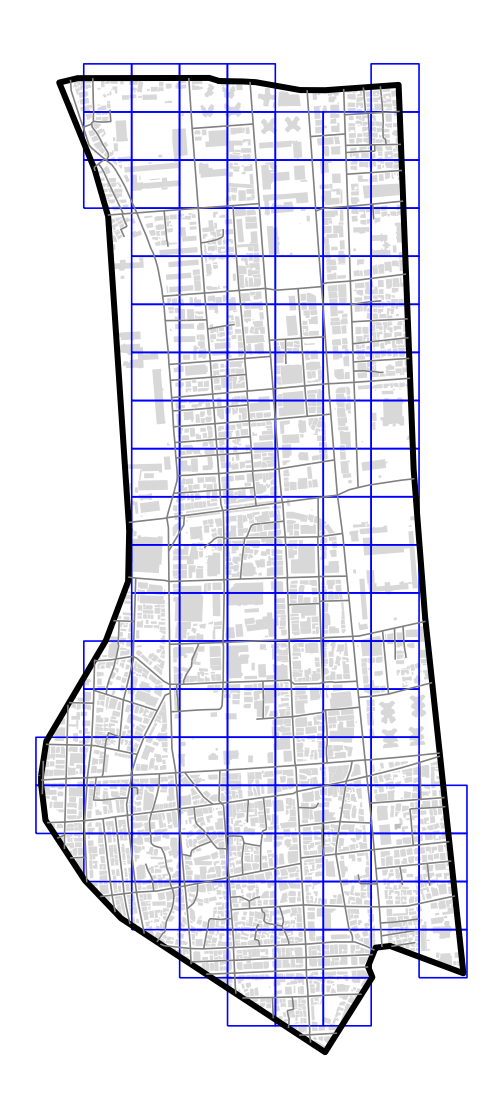

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')

# plot
df_road.plot(ax=ax, facecolor='none', edgecolor='grey', linewidth=0.8)
df_building.plot(ax=ax, facecolor='grey', edgecolor='none', alpha=0.3)
study_grid.plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=0.8)
study_area.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=3)

plt.show()

# 1. 원도심 활력 측정

## 1.1. 인구: 유동인구 현황

### 1.1.1. 기본현황 분석

In [20]:
df_liv_pop = dataframes['성연령별_유동인구'].copy()
df_liv_pop = gpd.GeoDataFrame(df_liv_pop, geometry='geometry')
df_liv_pop

,STD_YM,m_10g_pop,m_20g_pop,m_30g_pop,m_40g_pop,m_50g_pop,m_60g_pop,w_10g_pop,w_20g_pop,w_30g_pop,w_40g_pop,w_50g_pop,w_60g_pop,lon,lat,geometry
0,202001,0.02,0.04,0.06,0.06,0.10,0.15,0.00,0.04,0.04,0.04,0.12,0.08,127.500380,36.497170,POINT (127.50038 36.49717)
1,202001,0.00,0.02,0.04,0.06,0.09,0.08,0.00,0.02,0.04,0.06,0.08,0.06,127.500380,36.511144,POINT (127.50038 36.51114)
2,202001,0.02,0.04,0.04,0.09,0.18,0.13,0.00,0.04,0.06,0.08,0.10,0.11,127.500380,36.511594,POINT (127.50038 36.51159)
3,202001,0.04,0.06,0.09,0.18,0.23,0.22,0.04,0.04,0.08,0.10,0.16,0.15,127.500380,36.512045,POINT (127.50038 36.51205)
4,202001,0.04,0.06,0.09,0.14,0.21,0.20,0.02,0.04,0.06,0.09,0.14,0.13,127.500380,36.512496,POINT (127.50038 36.51250)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077955,202212,0.00,0.09,0.14,0.26,0.28,0.18,0.00,0.04,0.05,0.07,0.07,0.07,127.499821,36.768521,POINT (127.49982 36.76852)
4077956,202212,0.02,0.18,0.34,0.62,0.65,0.48,0.04,0.07,0.12,0.16,0.18,0.12,127.499821,36.769423,POINT (127.49982 36.76942)
4077957,202212,0.02,0.11,0.23,0.41,0.42,0.32,0.02,0.05,0.07,0.11,0.11,0.07,127.499821,36.769873,POINT (127.49982 36.76987)
4077958,202212,0.00,0.00,0.02,0.04,0.04,0.02,0.00,0.00,0.00,0.00,0.00,0.00,127.499821,36.773479,POINT (127.49982 36.77348)


### 1.1.2. 격자단위 누적 유동인구 집계

In [21]:
# 전체인구 합계
df_liv_pop['total_pop'] = df_liv_pop.iloc[:, 1:13].sum(axis=1)

# # 남성 합계
# df_liv_pop['male_pop'] = df_liv_pop.iloc[:, 1:7].sum(axis=1)

# # 여성 합계
# df_liv_pop['female_pop'] = df_liv_pop.iloc[:, 7:13].sum(axis=1)

# 연령대별 합계
ages = ['10g', '20g', '30g', '40g', '50g', '60g']
for age in ages:
    male_col = 'm_' + age + '_pop'
    female_col = 'w_' + age + '_pop'
    df_liv_pop[age + '_pop'] = df_liv_pop[male_col] + df_liv_pop[female_col]

df_liv_pop


,STD_YM,m_10g_pop,m_20g_pop,m_30g_pop,m_40g_pop,m_50g_pop,m_60g_pop,w_10g_pop,w_20g_pop,w_30g_pop,...,lon,lat,geometry,total_pop,10g_pop,20g_pop,30g_pop,40g_pop,50g_pop,60g_pop
0,202001,0.02,0.04,0.06,0.06,0.10,0.15,0.00,0.04,0.04,...,127.500380,36.497170,POINT (127.50038 36.49717),0.75,0.02,0.08,0.10,0.10,0.22,0.23
1,202001,0.00,0.02,0.04,0.06,0.09,0.08,0.00,0.02,0.04,...,127.500380,36.511144,POINT (127.50038 36.51114),0.55,0.00,0.04,0.08,0.12,0.17,0.14
2,202001,0.02,0.04,0.04,0.09,0.18,0.13,0.00,0.04,0.06,...,127.500380,36.511594,POINT (127.50038 36.51159),0.89,0.02,0.08,0.10,0.17,0.28,0.24
3,202001,0.04,0.06,0.09,0.18,0.23,0.22,0.04,0.04,0.08,...,127.500380,36.512045,POINT (127.50038 36.51205),1.39,0.08,0.10,0.17,0.28,0.39,0.37
4,202001,0.04,0.06,0.09,0.14,0.21,0.20,0.02,0.04,0.06,...,127.500380,36.512496,POINT (127.50038 36.51250),1.22,0.06,0.10,0.15,0.23,0.35,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077955,202212,0.00,0.09,0.14,0.26,0.28,0.18,0.00,0.04,0.05,...,127.499821,36.768521,POINT (127.49982 36.76852),1.25,0.00,0.13,0.19,0.33,0.35,0.25
4077956,202212,0.02,0.18,0.34,0.62,0.65,0.48,0.04,0.07,0.12,...,127.499821,36.769423,POINT (127.49982 36.76942),2.98,0.06,0.25,0.46,0.78,0.83,0.60
4077957,202212,0.02,0.11,0.23,0.41,0.42,0.32,0.02,0.05,0.07,...,127.499821,36.769873,POINT (127.49982 36.76987),1.94,0.04,0.16,0.30,0.52,0.53,0.39
4077958,202212,0.00,0.00,0.02,0.04,0.04,0.02,0.00,0.00,0.00,...,127.499821,36.773479,POINT (127.49982 36.77348),0.12,0.00,0.00,0.02,0.04,0.04,0.02


In [22]:
# 공간 조인
joined_data = gpd.sjoin(study_grid, df_liv_pop, how="left", op="intersects")

# 격자별로 living_pop 값을 합계
# summed_pop = joined_data.groupby('gid')[['total_pop', 'male_pop', 'female_pop', '10g_pop', '20g_pop', '30g_pop', '40g_pop', '50g_pop', '60g_pop']].sum().reset_index()
summed_pop = joined_data.groupby('gid')[['total_pop']].sum().reset_index()

# merged_grid 복사
merged_grid = study_grid.copy()

# 병합
merged_grid = merged_grid.merge(summed_pop, on='gid', how='left')

merged_grid


,gid,geometry,total_pop
0,다바993480,"POLYGON ((127.49217 36.62988, 127.49217 36.630...",5347.43
1,다바986484,"POLYGON ((127.48434 36.63348, 127.48434 36.634...",14242.35
2,다바993479,"POLYGON ((127.49217 36.62898, 127.49217 36.629...",13406.70
3,다바992492,"POLYGON ((127.49105 36.64070, 127.49105 36.641...",14371.96
4,다바987485,"POLYGON ((127.48546 36.63439, 127.48546 36.635...",30097.65
...,...,...,...
122,다바990494,"POLYGON ((127.48881 36.64250, 127.48881 36.643...",25625.10
123,다바987490,"POLYGON ((127.48546 36.63889, 127.48546 36.639...",5027.13
124,다바992487,"POLYGON ((127.49105 36.63619, 127.49105 36.637...",3812.16
125,다바987489,"POLYGON ((127.48546 36.63799, 127.48546 36.638...",3808.74


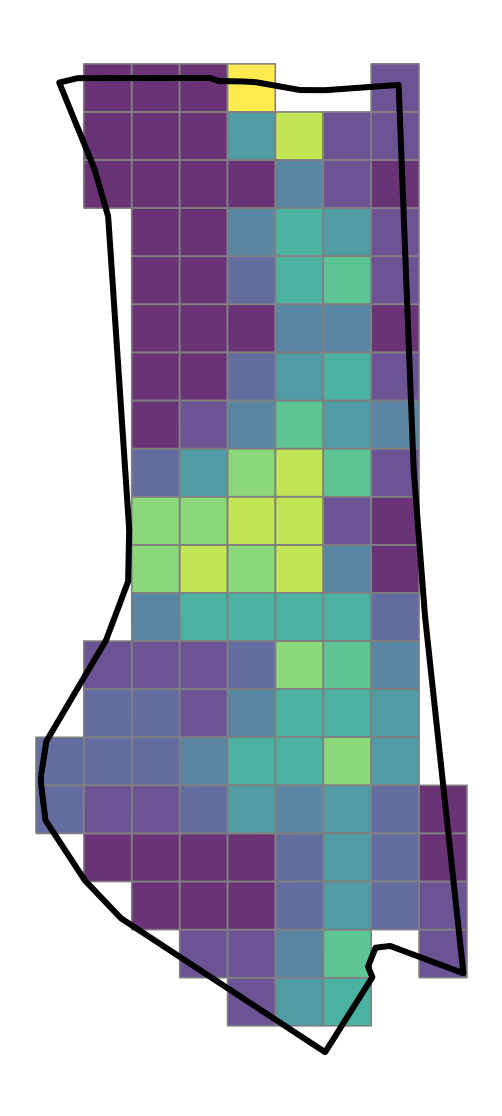

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')

# plot
merged_grid.plot(ax=ax, column='total_pop', scheme='naturalbreaks', k=10, alpha=0.8)

study_grid.plot(ax=ax, facecolor='none', edgecolor='grey', linewidth=0.8)
study_area.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=3)

plt.show()

## 1.2. 상권: 카드매출 현황

### 1.2.1. 기본현황 분석

In [24]:
df_card_sales = dataframes['카드매출_격자매핑'].copy()
df_card_sales

,stdr_ym,kbc_bzc_nm_1,kbc_bzc_nm_2,kbc_bzc_nm_3,card_sales,est_sales,gid
0,202305,서비스,(정기)납부/대여서비스,미디어/음향,989000,18995.0,다바989487
1,202305,서비스,(정기)납부/대여서비스,도서/음반대여,54000,844.0,다바989487
2,202305,서비스,의료서비스,한의원,5019200,83333.0,다바992490
3,202305,소매업,의류,여성의류,1600000,25979.0,다바990484
4,202305,소매업,패션잡화,구두제화,103500,3315.0,다바989483
...,...,...,...,...,...,...,...
13974,202306,소매업,의류,일반의류(기타),1657400,0.0,다바990481
13975,202305,음식,커피/음료,커피전문점,98200,0.0,다바987489
13976,202306,소매업,패션잡화,액세서리,109010,0.0,다바988486
13977,202305,음식,기타외국식,쌀국수전문점,8000,0.0,다바991482


In [25]:
# 컬럼명 변경
df_card_sales.rename(columns={
    'stdr_ym': '기준년월',
    'kbc_bzc_nm_1': 'KB카드대분류',
    'kbc_bzc_nm_2': 'KB카드중분류',
    'kbc_bzc_nm_3': 'KB카드세분류',
    'card_sales': 'KB카드매출액',
    'est_sales': '총매출추정금액_천원'
}, inplace=True)

df_card_sales


,기준년월,KB카드대분류,KB카드중분류,KB카드세분류,KB카드매출액,총매출추정금액_천원,gid
0,202305,서비스,(정기)납부/대여서비스,미디어/음향,989000,18995.0,다바989487
1,202305,서비스,(정기)납부/대여서비스,도서/음반대여,54000,844.0,다바989487
2,202305,서비스,의료서비스,한의원,5019200,83333.0,다바992490
3,202305,소매업,의류,여성의류,1600000,25979.0,다바990484
4,202305,소매업,패션잡화,구두제화,103500,3315.0,다바989483
...,...,...,...,...,...,...,...
13974,202306,소매업,의류,일반의류(기타),1657400,0.0,다바990481
13975,202305,음식,커피/음료,커피전문점,98200,0.0,다바987489
13976,202306,소매업,패션잡화,액세서리,109010,0.0,다바988486
13977,202305,음식,기타외국식,쌀국수전문점,8000,0.0,다바991482


### 1.2.2. 격자단위 누적 총매출추정금액 집계

In [26]:
# groupby
df_card_sales = df_card_sales.groupby('gid')['총매출추정금액_천원'].sum().to_frame().reset_index()

# 단위 환산
df_card_sales['총매출추정금액_억원'] = df_card_sales['총매출추정금액_천원'] / 10000

# merge
merged_grid = merged_grid.merge(df_card_sales[['gid', '총매출추정금액_억원']], on='gid', how='left')
merged_grid

,gid,geometry,total_pop,총매출추정금액_억원
0,다바993480,"POLYGON ((127.49217 36.62988, 127.49217 36.630...",5347.43,26.0962
1,다바986484,"POLYGON ((127.48434 36.63348, 127.48434 36.634...",14242.35,243.6206
2,다바993479,"POLYGON ((127.49217 36.62898, 127.49217 36.629...",13406.70,69.4445
3,다바992492,"POLYGON ((127.49105 36.64070, 127.49105 36.641...",14371.96,42.9745
4,다바987485,"POLYGON ((127.48546 36.63439, 127.48546 36.635...",30097.65,149.6829
...,...,...,...,...
122,다바990494,"POLYGON ((127.48881 36.64250, 127.48881 36.643...",25625.10,4.8558
123,다바987490,"POLYGON ((127.48546 36.63889, 127.48546 36.639...",5027.13,36.0720
124,다바992487,"POLYGON ((127.49105 36.63619, 127.49105 36.637...",3812.16,NaN
125,다바987489,"POLYGON ((127.48546 36.63799, 127.48546 36.638...",3808.74,13.9984


In [481]:
merged_grid[['gid', 'geometry', '총매출추정금액_억원']]

,gid,geometry,총매출추정금액_억원
0,다바993480,"POLYGON ((127.49217 36.62988, 127.49217 36.630...",26.0962
1,다바986484,"POLYGON ((127.48434 36.63348, 127.48434 36.634...",243.6206
2,다바993479,"POLYGON ((127.49217 36.62898, 127.49217 36.629...",69.4445
3,다바992492,"POLYGON ((127.49105 36.64070, 127.49105 36.641...",42.9745
4,다바987485,"POLYGON ((127.48546 36.63439, 127.48546 36.635...",149.6829
...,...,...,...
122,다바990494,"POLYGON ((127.48881 36.64250, 127.48881 36.643...",4.8558
123,다바987490,"POLYGON ((127.48546 36.63889, 127.48546 36.639...",36.0720
124,다바992487,"POLYGON ((127.49105 36.63619, 127.49105 36.637...",NaN
125,다바987489,"POLYGON ((127.48546 36.63799, 127.48546 36.638...",13.9984


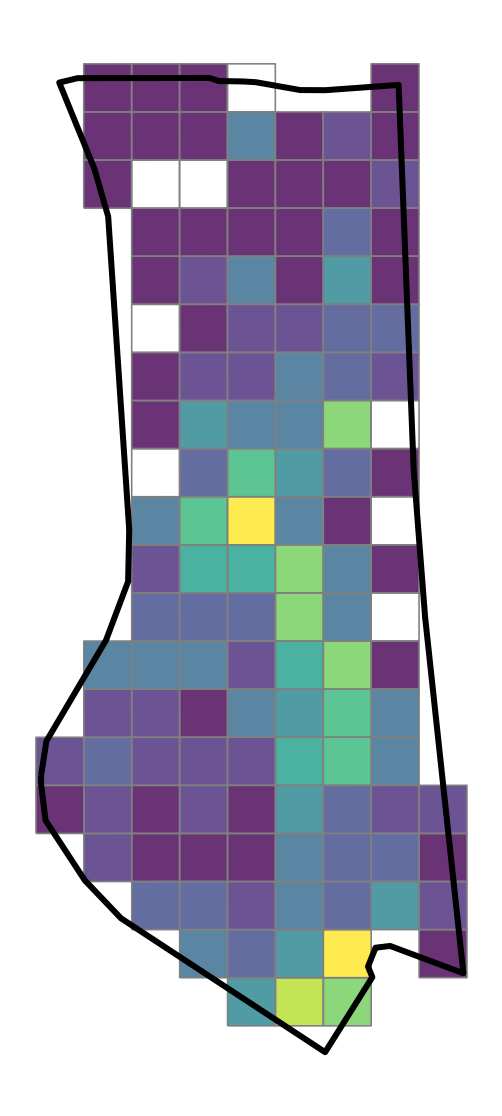

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')

# plot
merged_grid.plot(ax=ax, column='총매출추정금액_억원', scheme='naturalbreaks', k=10, alpha=0.8)

study_grid.plot(ax=ax, facecolor='none', edgecolor='grey', linewidth=0.8)
study_area.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=3)

plt.show()

# 2. 원도심 활력 분석

## 2.1. 복합 원도심활력지수 산출

In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.impute import SimpleImputer

In [29]:
# 데이터 준비
data = merged_grid[['total_pop', '총매출추정금액_억원']].copy()

# 1. 데이터 정규화
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# NaN 값 대체
imputer = SimpleImputer(strategy='mean')
data_scaled_imputed = imputer.fit_transform(data_scaled)

# 2. 요인 분석
fa = FactorAnalysis(n_components=1)
fa_result = fa.fit_transform(data_scaled_imputed)

# 3. 가중치 산출
loadings = fa.components_

# 4. 가중치를 사용하여 지수 계산
merged_grid['원도심활력지수'] = (data_scaled * loadings[0]).sum(axis=1)

merged_grid


,gid,geometry,total_pop,총매출추정금액_억원,원도심활력지수
0,다바993480,"POLYGON ((127.49217 36.62988, 127.49217 36.630...",5347.43,26.0962,0.008925
1,다바986484,"POLYGON ((127.48434 36.63348, 127.48434 36.634...",14242.35,243.6206,0.046429
2,다바993479,"POLYGON ((127.49217 36.62898, 127.49217 36.629...",13406.70,69.4445,0.027473
3,다바992492,"POLYGON ((127.49105 36.64070, 127.49105 36.641...",14371.96,42.9745,0.026516
4,다바987485,"POLYGON ((127.48546 36.63439, 127.48546 36.635...",30097.65,149.6829,0.064928
...,...,...,...,...,...
122,다바990494,"POLYGON ((127.48881 36.64250, 127.48881 36.643...",25625.10,4.8558,0.042511
123,다바987490,"POLYGON ((127.48546 36.63889, 127.48546 36.639...",5027.13,36.0720,0.009362
124,다바992487,"POLYGON ((127.49105 36.63619, 127.49105 36.637...",3812.16,NaN,0.003601
125,다바987489,"POLYGON ((127.48546 36.63799, 127.48546 36.638...",3808.74,13.9984,0.005000


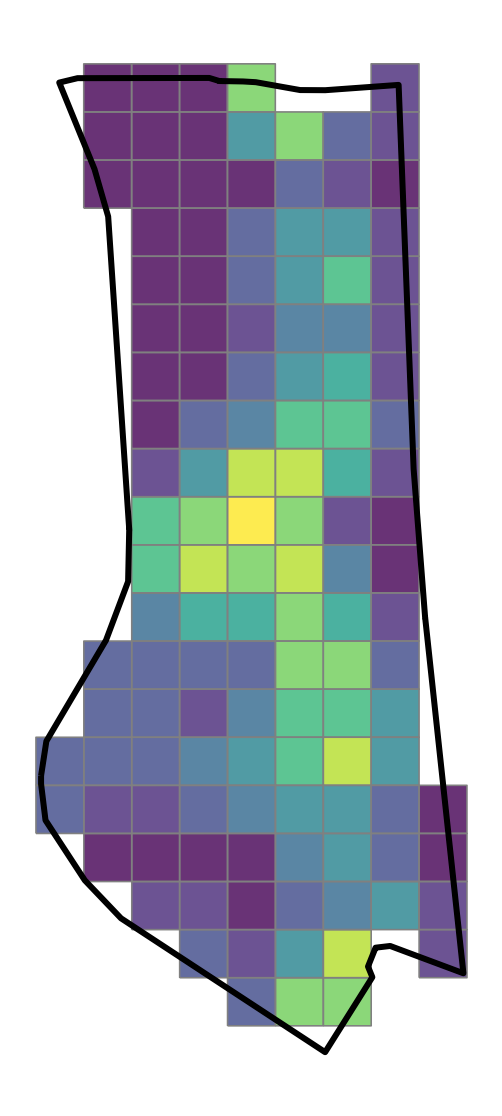

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')

# plot
merged_grid.plot(ax=ax, column='원도심활력지수', scheme='naturalbreaks', k=10, alpha=0.8)

study_grid.plot(ax=ax, facecolor='none', edgecolor='grey', linewidth=0.8)
study_area.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=3)

plt.show()

## 2.2. 공간적 클러스터 분석 (Moran's I)

Moran's I: 0.5529938362126127, p-value: 0.001


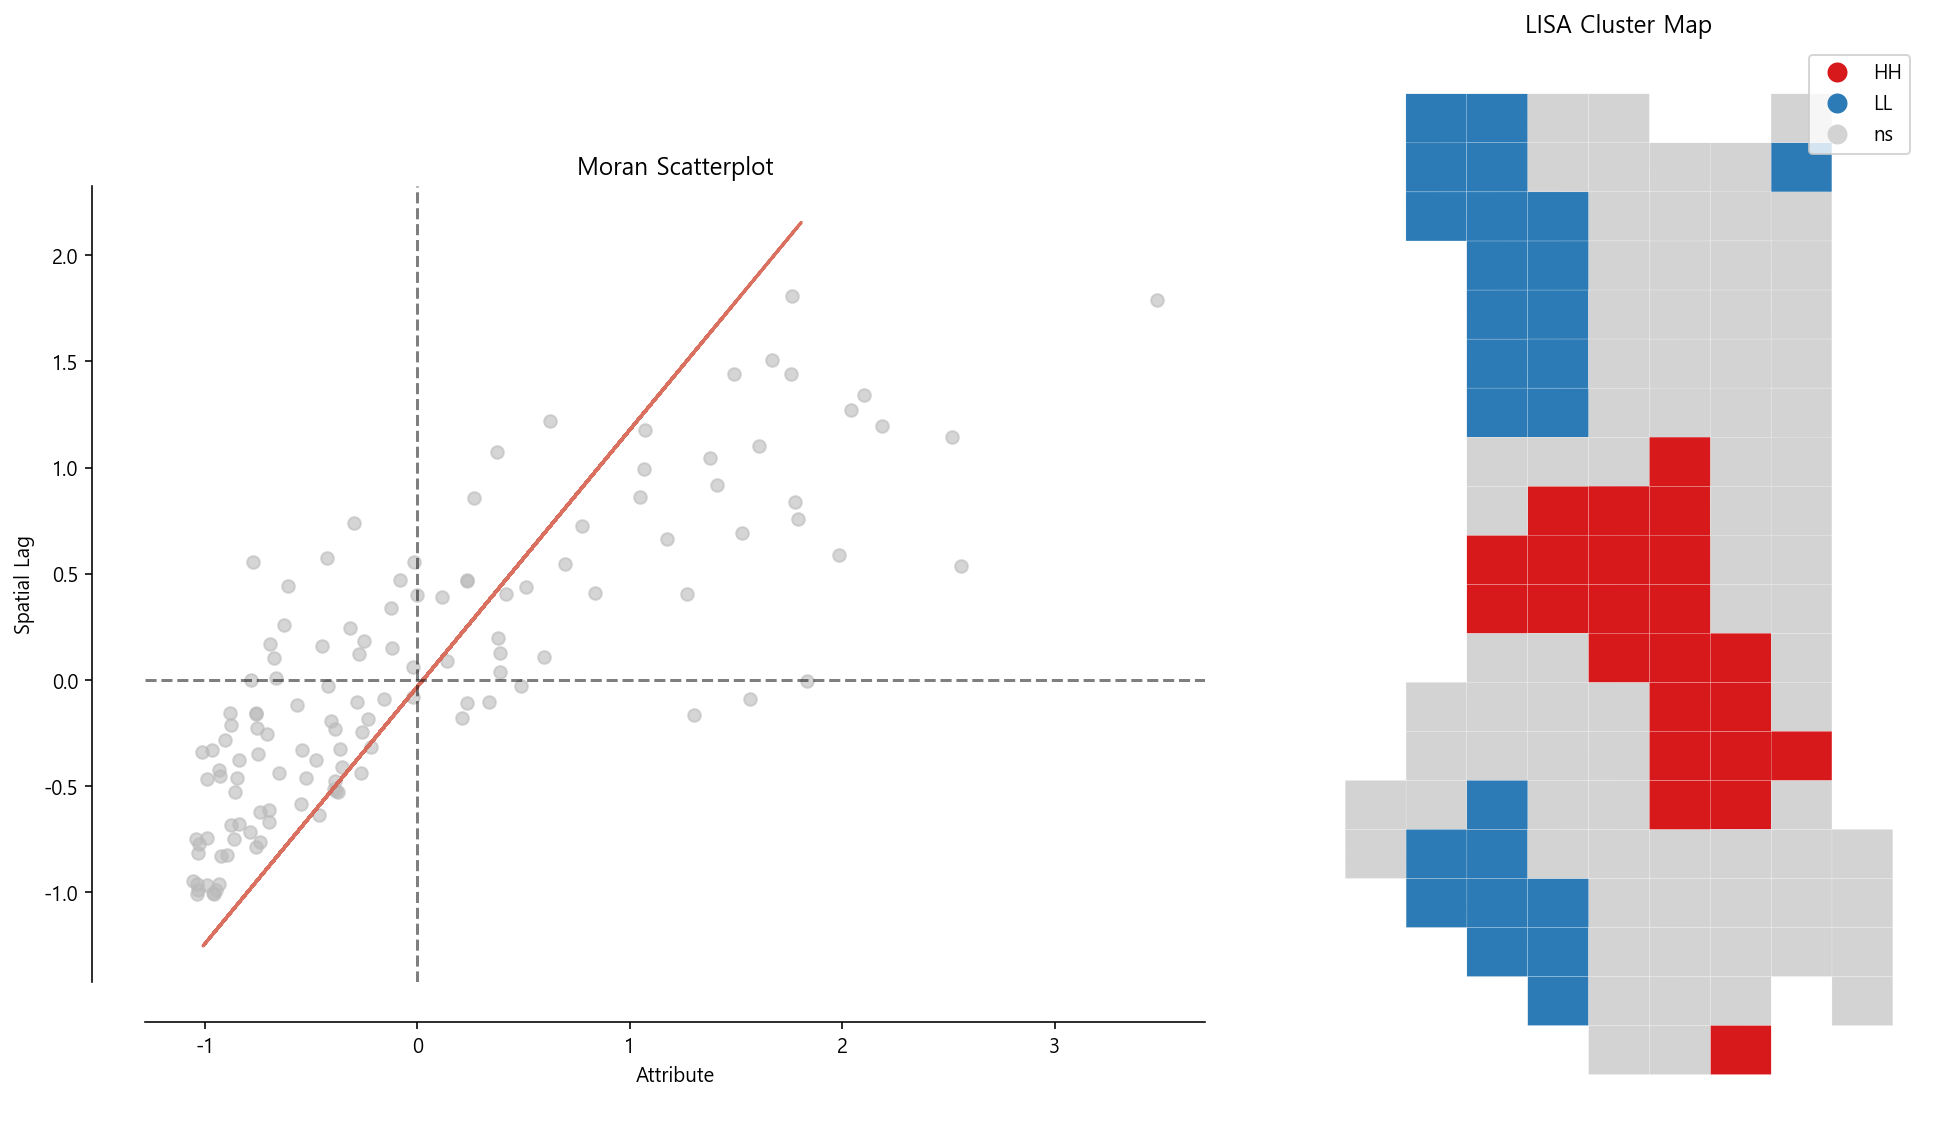

,gid,geometry,total_pop,총매출추정금액_억원,원도심활력지수,lisa,lisa_cluster
0,다바993480,"POLYGON ((127.49217 36.62988, 127.49217 36.630...",5347.43,26.0962,0.008925,0.393074,ns
1,다바986484,"POLYGON ((127.48434 36.63348, 127.48434 36.634...",14242.35,243.6206,0.046429,0.117323,ns
2,다바993479,"POLYGON ((127.49217 36.62898, 127.49217 36.629...",13406.70,69.4445,0.027473,0.284173,ns
3,다바992492,"POLYGON ((127.49105 36.64070, 127.49105 36.641...",14371.96,42.9745,0.026516,-0.006756,ns
4,다바987485,"POLYGON ((127.48546 36.63439, 127.48546 36.635...",30097.65,149.6829,0.064928,-0.038030,ns
...,...,...,...,...,...,...,...
122,다바990494,"POLYGON ((127.48881 36.64250, 127.48881 36.643...",25625.10,4.8558,0.042511,0.012041,ns
123,다바987490,"POLYGON ((127.48546 36.63889, 127.48546 36.639...",5027.13,36.0720,0.009362,0.762867,LL
124,다바992487,"POLYGON ((127.49105 36.63619, 127.49105 36.637...",3812.16,NaN,0.003601,0.340963,ns
125,다바987489,"POLYGON ((127.48546 36.63799, 127.48546 36.638...",3808.74,13.9984,0.005000,0.461400,ns


In [31]:
import geopandas as gpd
import pysal as ps
from pysal.explore import esda
from pysal.lib import weights
from splot.esda import moran_scatterplot, lisa_cluster
import matplotlib.pyplot as plt

# 1. 공간 가중치 행렬 생성
w = weights.Queen.from_dataframe(merged_grid)
w.transform = 'R'

# 2. 모란 아이 분석
moran = esda.Moran(merged_grid['원도심활력지수'], w)
print(f"Moran's I: {moran.I}, p-value: {moran.p_sim}")

# 3. LISA 분석
lisa = esda.Moran_Local(merged_grid['원도심활력지수'], w)

# 결과 시각화
fig, axs = plt.subplots(1, 2, figsize=(15,8))

# 모란 아이 스캐터 플롯
moran_scatterplot(moran, ax=axs[0])
axs[0].set_title('Moran Scatterplot')

# LISA 클러스터 맵
lisa_cluster(lisa, merged_grid, ax=axs[1])
axs[1].set_title('LISA Cluster Map')

plt.tight_layout()
plt.show()

# LISA 결과를 'lisa' 열에 추가
merged_grid['lisa'] = lisa.Is

# LISA 값에 따라 HH, LL, HL, LH, NS로 분류
# p-value에 따른 분류도 추가
significance_level = 0.05
merged_grid['lisa_cluster'] = 'ns'
merged_grid.loc[(lisa.q == 1) & (lisa.p_sim < significance_level), 'lisa_cluster'] = 'HH'
merged_grid.loc[(lisa.q == 2) & (lisa.p_sim < significance_level), 'lisa_cluster'] = 'LH'
merged_grid.loc[(lisa.q == 3) & (lisa.p_sim < significance_level), 'lisa_cluster'] = 'LL'
merged_grid.loc[(lisa.q == 4) & (lisa.p_sim < significance_level), 'lisa_cluster'] = 'HL'

merged_grid


## 2.3. 상권 업종별 생존 분석
(자료 출처: 지방행정인허가데이터)

### 2.3.1. 데이터 불러오기

In [295]:
# 파일 불러오기
geo_df = gpd.read_file(source_folder + '/output/geo_df.geojson')

# 날짜 데이터타입으로 변경
geo_df['인허가일자'] = pd.to_datetime(geo_df['인허가일자'])
geo_df['폐업일자'] = pd.to_datetime(geo_df['폐업일자'])

geo_df

,구분,개방서비스명,업태구분명,인허가일자,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,geometry
0,요식업종,제과점영업,제과점영업,2019-01-09,영업,NaT,충청북도 청주시 상당구 서문동 157-14,"충청북도 청주시 상당구 사직대로 346, 지하2층 (서문동)",POINT (127.48309 36.63629)
1,요식업종,제과점영업,제과점영업,2019-02-14,영업,NaT,충청북도 청주시 청원구 주중동 1054 103호,"충청북도 청주시 청원구 주성로 255, 103호 (주중동)",POINT (127.49184 36.67103)
2,요식업종,제과점영업,제과점영업,2019-11-11,영업,NaT,충청북도 청주시 상당구 탑동 257-3 1층,"충청북도 청주시 상당구 탑동로31번길 28, 1층 (탑동)",POINT (127.49427 36.63034)
3,요식업종,제과점영업,제과점영업,2023-09-05,영업,NaT,충청북도 청주시 흥덕구 오송읍 봉산리 1022,"충청북도 청주시 흥덕구 오송읍 오송생명7로 164, 1층",POINT (127.31469 36.62153)
4,요식업종,제과점영업,제과점영업,2019-05-21,영업,NaT,충청북도 청주시 서원구 분평동 1258,"충청북도 청주시 서원구 월평로 78, 분평동은사우나 1층 103,104호 (분평동)",POINT (127.49057 36.61113)
...,...,...,...,...,...,...,...,...,...
75051,관광숙박업종,한옥체험업,None,2016-12-27,영업,NaT,충청북도 청주시 청원구 오창읍 용두리 270,충청북도 청주시 청원구 오창읍 미래지로 71-51,POINT (127.40199 36.73484)
75052,관광숙박업종,한옥체험업,None,2017-11-30,영업,NaT,충청북도 청주시 상당구 문의면 남계리 산 6-2번지,None,POINT (127.50030 36.53882)
75053,관광숙박업종,한옥체험업,None,2019-08-05,영업,NaT,충청북도 청주시 청원구 오창읍 용두리 283번지,None,POINT (127.40297 36.73465)
75054,관광숙박업종,한옥체험업,None,2022-11-01,영업,NaT,충청북도 청주시 청원구 오창읍 용두리 269,충청북도 청주시 청원구 오창읍 미래지로 71-63,POINT (127.40224 36.73507)


In [296]:
# 중복 행이 있는지 확인
duplicates = geo_df.duplicated(keep=False)

# 중복 행이 있다면 True 값을 가지는 행만 출력
geo_df[duplicates]

,구분,개방서비스명,업태구분명,인허가일자,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,geometry
146,요식업종,제과점영업,제과점영업,2012-08-02,영업,NaT,충청북도 청주시 흥덕구 복대동 3380번지 현대백화점충청점(지하1층),"충청북도 청주시 흥덕구 직지대로 308 (복대동, 현대백화점충청점(지하1층))",POINT (127.42337 36.64476)
147,요식업종,제과점영업,제과점영업,2012-08-02,영업,NaT,충청북도 청주시 흥덕구 복대동 3380번지 현대백화점충청점(지하1층),"충청북도 청주시 흥덕구 직지대로 308 (복대동, 현대백화점충청점(지하1층))",POINT (127.42337 36.64476)
913,요식업종,일반음식점,한식,2021-01-25,폐업,2022-07-12,충청북도 청주시 흥덕구 봉명동 2479,"충청북도 청주시 흥덕구 덕암로47번길 15, 1층 (봉명동)",POINT (127.45627 36.65381)
1800,요식업종,일반음식점,한식,2011-04-13,폐업,2021-11-25,충청북도 청주시 흥덕구 송절동 108-3 외 1필지(1층),"충청북도 청주시 흥덕구 송절로 55, 1층 (송절동)",POINT (127.45248 36.65875)
2922,요식업종,일반음식점,한식,1998-06-03,폐업,2007-03-23,충청북도 청주시 상당구 미원면 운암리 230-2번지,None,POINT (127.67490 36.61288)
...,...,...,...,...,...,...,...,...,...
73074,도소매업종,담배소매업,None,2018-04-02,영업,NaT,충청북도 청주시 청원구 내수읍 원통리 37번지 1호,충청북도 청주시 청원구 내수읍 원통길 33-12,POINT (127.51345 36.71633)
73491,도소매업종,담배소매업,None,2018-09-21,영업,NaT,충청북도 청주시 청원구 내덕동 36번지 청주대학교,"충청북도 청주시 청원구 대성로 298, 청주대학교 (내덕동)",POINT (127.49090 36.65241)
73492,도소매업종,담배소매업,None,2018-09-21,영업,NaT,충청북도 청주시 청원구 내덕동 36번지 청주대학교,"충청북도 청주시 청원구 대성로 298, 청주대학교 (내덕동)",POINT (127.49090 36.65241)
73493,도소매업종,담배소매업,None,2018-09-21,영업,NaT,충청북도 청주시 청원구 내덕동 36번지 청주대학교,"충청북도 청주시 청원구 대성로 298, 청주대학교 (내덕동)",POINT (127.49090 36.65241)


In [297]:
# 모든 열이 같은 중복 행 제거
geo_df = geo_df.drop_duplicates(keep=False)

geo_df

,구분,개방서비스명,업태구분명,인허가일자,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,geometry
0,요식업종,제과점영업,제과점영업,2019-01-09,영업,NaT,충청북도 청주시 상당구 서문동 157-14,"충청북도 청주시 상당구 사직대로 346, 지하2층 (서문동)",POINT (127.48309 36.63629)
1,요식업종,제과점영업,제과점영업,2019-02-14,영업,NaT,충청북도 청주시 청원구 주중동 1054 103호,"충청북도 청주시 청원구 주성로 255, 103호 (주중동)",POINT (127.49184 36.67103)
2,요식업종,제과점영업,제과점영업,2019-11-11,영업,NaT,충청북도 청주시 상당구 탑동 257-3 1층,"충청북도 청주시 상당구 탑동로31번길 28, 1층 (탑동)",POINT (127.49427 36.63034)
3,요식업종,제과점영업,제과점영업,2023-09-05,영업,NaT,충청북도 청주시 흥덕구 오송읍 봉산리 1022,"충청북도 청주시 흥덕구 오송읍 오송생명7로 164, 1층",POINT (127.31469 36.62153)
4,요식업종,제과점영업,제과점영업,2019-05-21,영업,NaT,충청북도 청주시 서원구 분평동 1258,"충청북도 청주시 서원구 월평로 78, 분평동은사우나 1층 103,104호 (분평동)",POINT (127.49057 36.61113)
...,...,...,...,...,...,...,...,...,...
75051,관광숙박업종,한옥체험업,None,2016-12-27,영업,NaT,충청북도 청주시 청원구 오창읍 용두리 270,충청북도 청주시 청원구 오창읍 미래지로 71-51,POINT (127.40199 36.73484)
75052,관광숙박업종,한옥체험업,None,2017-11-30,영업,NaT,충청북도 청주시 상당구 문의면 남계리 산 6-2번지,None,POINT (127.50030 36.53882)
75053,관광숙박업종,한옥체험업,None,2019-08-05,영업,NaT,충청북도 청주시 청원구 오창읍 용두리 283번지,None,POINT (127.40297 36.73465)
75054,관광숙박업종,한옥체험업,None,2022-11-01,영업,NaT,충청북도 청주시 청원구 오창읍 용두리 269,충청북도 청주시 청원구 오창읍 미래지로 71-63,POINT (127.40224 36.73507)


### 2.3.2. 데이터 clip

In [298]:
# clip
geo_df = gpd.clip(geo_df, study_area)

# reset_index
geo_df.reset_index(drop=True, inplace=True)

geo_df

,구분,개방서비스명,업태구분명,인허가일자,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,geometry
0,요식업종,제과점영업,제과점영업,2019-05-20,영업,NaT,충청북도 청주시 상당구 수동 315-24번지 1층,"충청북도 청주시 상당구 대성로 154, 1층 (수동)",POINT (127.48935 36.63900)
1,요식업종,제과점영업,제과점영업,2023-04-03,영업,NaT,충청북도 청주시 상당구 북문로3가 123 청주행정타운코아루휴티스,"충청북도 청주시 상당구 중앙로 80, 근린생활시설동 1층 103,104호 (북문로3...",POINT (127.48594 36.64424)
2,요식업종,제과점영업,제과점영업,2020-04-21,영업,NaT,"충청북도 청주시 상당구 북문로3가 44-1번지 106,107,108호","충청북도 청주시 상당구 사직대로361번길 158-10, 106,107,108호 (북...",POINT (127.48456 36.64378)
3,요식업종,제과점영업,제과점영업,2022-02-07,영업,NaT,충청북도 청주시 상당구 대성동 197,"충청북도 청주시 상당구 용담로 31-5, 1층 (대성동)",POINT (127.49190 36.63275)
4,요식업종,제과점영업,제과점영업,2019-04-10,영업,NaT,충청북도 청주시 상당구 북문로2가 77-1,"충청북도 청주시 상당구 상당로115번길 23, 1층 (북문로2가)",POINT (127.48578 36.63847)
...,...,...,...,...,...,...,...,...,...
4123,관광숙박업종,숙박업,여관업,1973-11-07,폐업,2003-06-14,충청북도 청주시 상당구 북문로2가 116-205번지,None,POINT (127.48658 36.63783)
4124,관광숙박업종,숙박업,여인숙업,1975-02-06,폐업,2002-05-18,충청북도 청주시 상당구 북문로2가 78-10번지,None,POINT (127.48564 36.63802)
4125,관광숙박업종,숙박업,여관업,1978-12-16,폐업,2014-01-22,충청북도 청주시 상당구 북문로1가 162-1번지,충청북도 청주시 상당구 성안로 10-2 (북문로1가),POINT (127.48569 36.63604)
4126,관광숙박업종,숙박업,여관업,1987-12-26,폐업,2020-05-27,충청북도 청주시 상당구 북문로3가 40-3번지,충청북도 청주시 상당구 중앙로 72-1 (북문로3가),POINT (127.48576 36.64345)


### 2.3.3. 생존시간 산출

In [299]:
# 기준 시작일자와 종료일자 설정
start_date = pd.Timestamp('2000-01-01')
end_date = pd.Timestamp('2023-10-31')

# 분석에 필요한 기간 동안의 데이터만 필터링
geo_df = geo_df[geo_df['인허가일자'] >= start_date].copy()

# reset_index
geo_df.reset_index(drop=True, inplace=True)

# 생존 시간 계산
geo_df['생존시간'] = np.where(geo_df['폐업일자'].notna() & (geo_df['폐업일자'] <= end_date),
                            (geo_df['폐업일자'] - geo_df['인허가일자']).dt.days,
                            (end_date - geo_df['인허가일자']).dt.days)

# 사건 발생 여부 계산
geo_df['사건발생'] = np.where(geo_df['폐업일자'].notna() & (geo_df['폐업일자'] <= end_date), 1, 0)

geo_df[['구분', '인허가일자', '폐업일자', '생존시간', '사건발생']]


,구분,인허가일자,폐업일자,생존시간,사건발생
0,요식업종,2019-05-20,NaT,1625.0,0
1,요식업종,2023-04-03,NaT,211.0,0
2,요식업종,2020-04-21,NaT,1288.0,0
3,요식업종,2022-02-07,NaT,631.0,0
4,요식업종,2019-04-10,NaT,1665.0,0
...,...,...,...,...,...
2360,관광숙박업종,2000-03-29,2003-05-13,1140.0,1
2361,관광숙박업종,2001-06-29,2014-03-14,4641.0,1
2362,관광숙박업종,2003-03-13,2012-09-26,3485.0,1
2363,관광숙박업종,2005-05-07,2015-10-30,3828.0,1


In [300]:
# sjoin 함수를 사용하기 위해 필요한 패키지를 임포트
from geopandas.tools import sjoin

# geo_df와 merged_grid를 공간적으로 조인
joined_df = sjoin(geo_df, merged_grid[['geometry', 'lisa_cluster']], how="left", op="within")

# lisa_cluster 열을 geo_df에 추가
geo_df['lisa_cluster'] = joined_df['lisa_cluster']

geo_df[['구분', '인허가일자', '폐업일자', '생존시간', '사건발생', 'lisa_cluster']]

,구분,인허가일자,폐업일자,생존시간,사건발생,lisa_cluster
0,요식업종,2019-05-20,NaT,1625.0,0,ns
1,요식업종,2023-04-03,NaT,211.0,0,LL
2,요식업종,2020-04-21,NaT,1288.0,0,LL
3,요식업종,2022-02-07,NaT,631.0,0,HH
4,요식업종,2019-04-10,NaT,1665.0,0,ns
...,...,...,...,...,...,...
2360,관광숙박업종,2000-03-29,2003-05-13,1140.0,1,ns
2361,관광숙박업종,2001-06-29,2014-03-14,4641.0,1,ns
2362,관광숙박업종,2003-03-13,2012-09-26,3485.0,1,NaN
2363,관광숙박업종,2005-05-07,2015-10-30,3828.0,1,HH


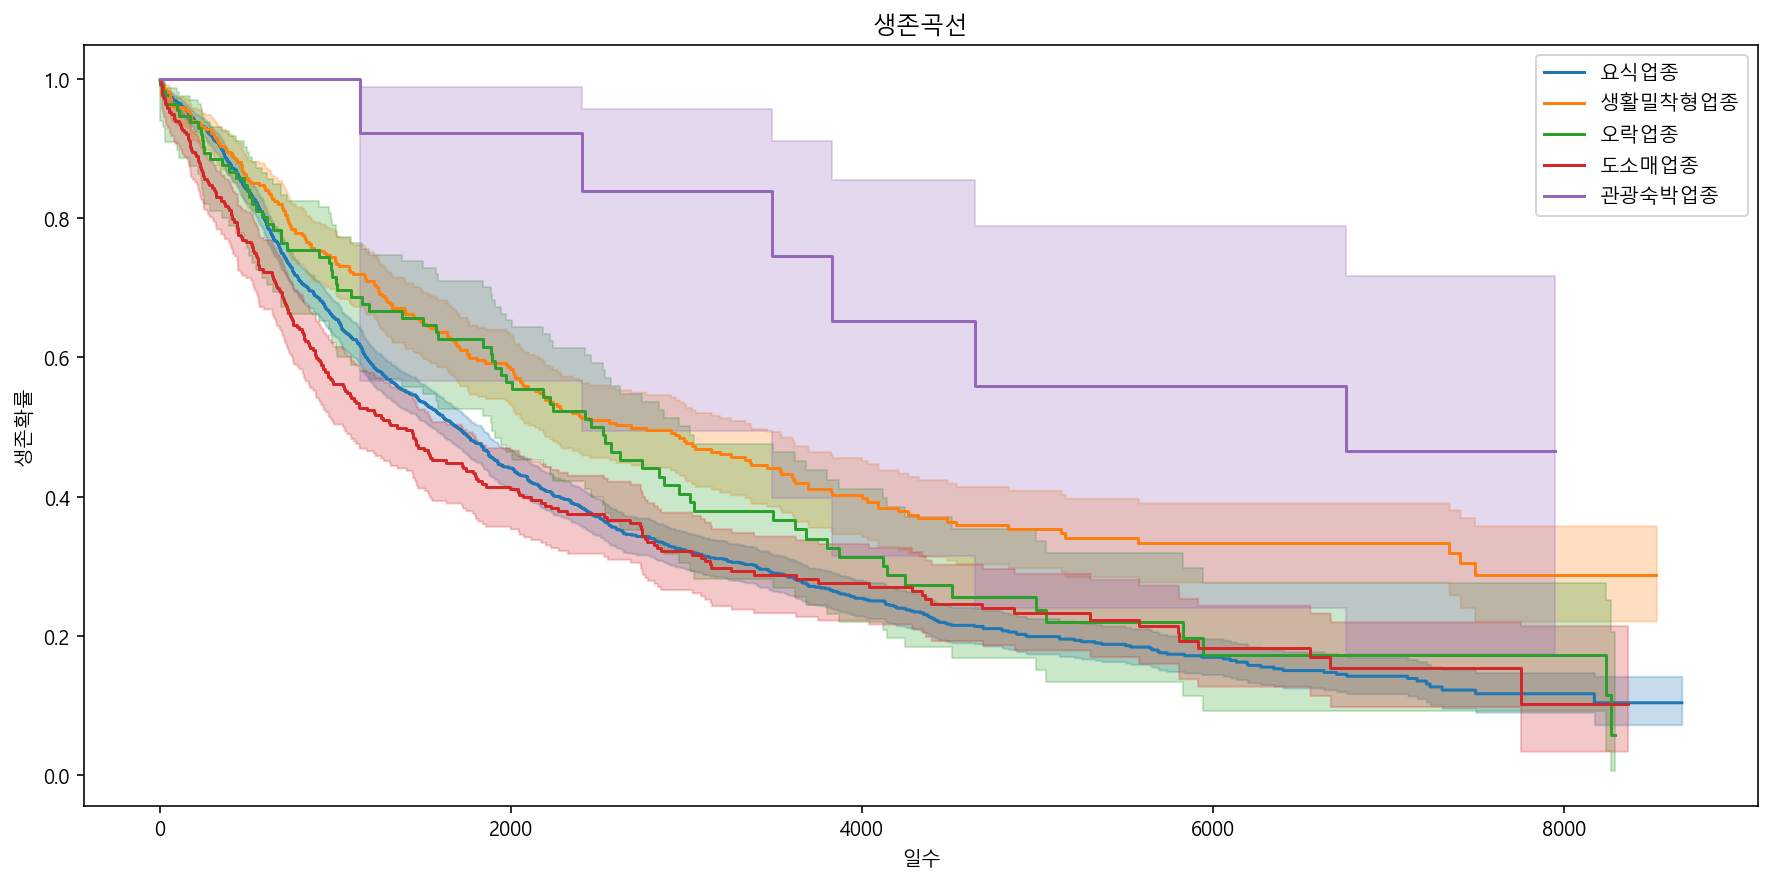

In [301]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

plt.figure(figsize=(15,7))

# '구분' 열의 각 카테고리 별 생존곡선
for category in geo_df['구분'].unique():
    subset = geo_df[geo_df['구분'] == category]
    kmf.fit(subset['생존시간'], event_observed=subset['사건발생'], label=category)
    kmf.plot()

plt.title('생존곡선')
plt.xlabel('일수')
plt.ylabel('생존확률')
plt.show()


### 2.3.4. 카플란-마이어(Kaplan-Meier) 생존 함수 추정

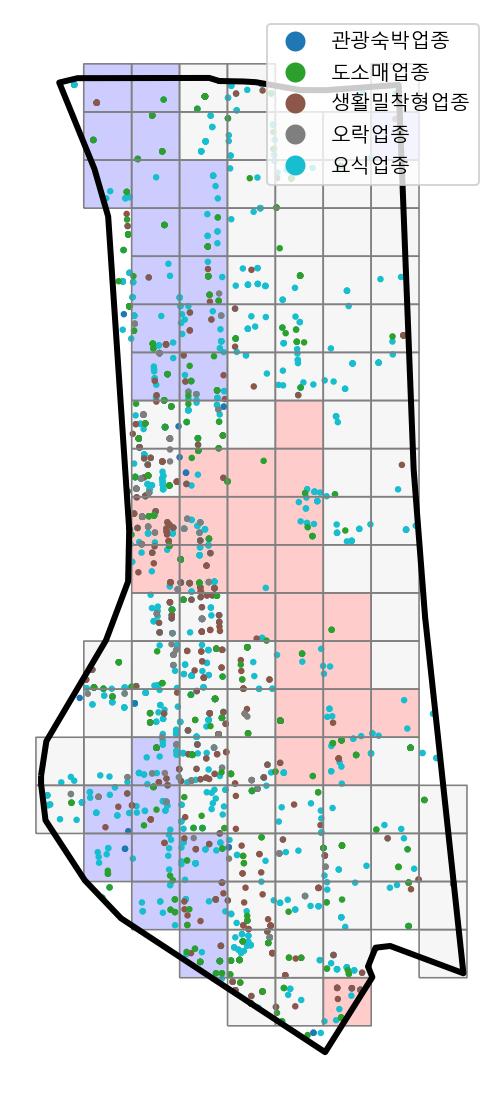

In [302]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')

# Define custom colors for lisa_cluster
colors = {
    'HH': 'red',
    'LL': 'blue',
    'ns': 'lightgrey'
}

# Plot merged_grid using colors dictionary
for cluster_type, color in colors.items():
    subset = merged_grid[merged_grid['lisa_cluster'] == cluster_type]
    subset.plot(ax=ax, color=color, alpha=0.2, label=cluster_type)

geo_df.plot(ax=ax, column='구분', markersize=5, legend=True)

study_grid.plot(ax=ax, facecolor='none', edgecolor='grey', linewidth=0.8)
study_area.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=3)

plt.show()


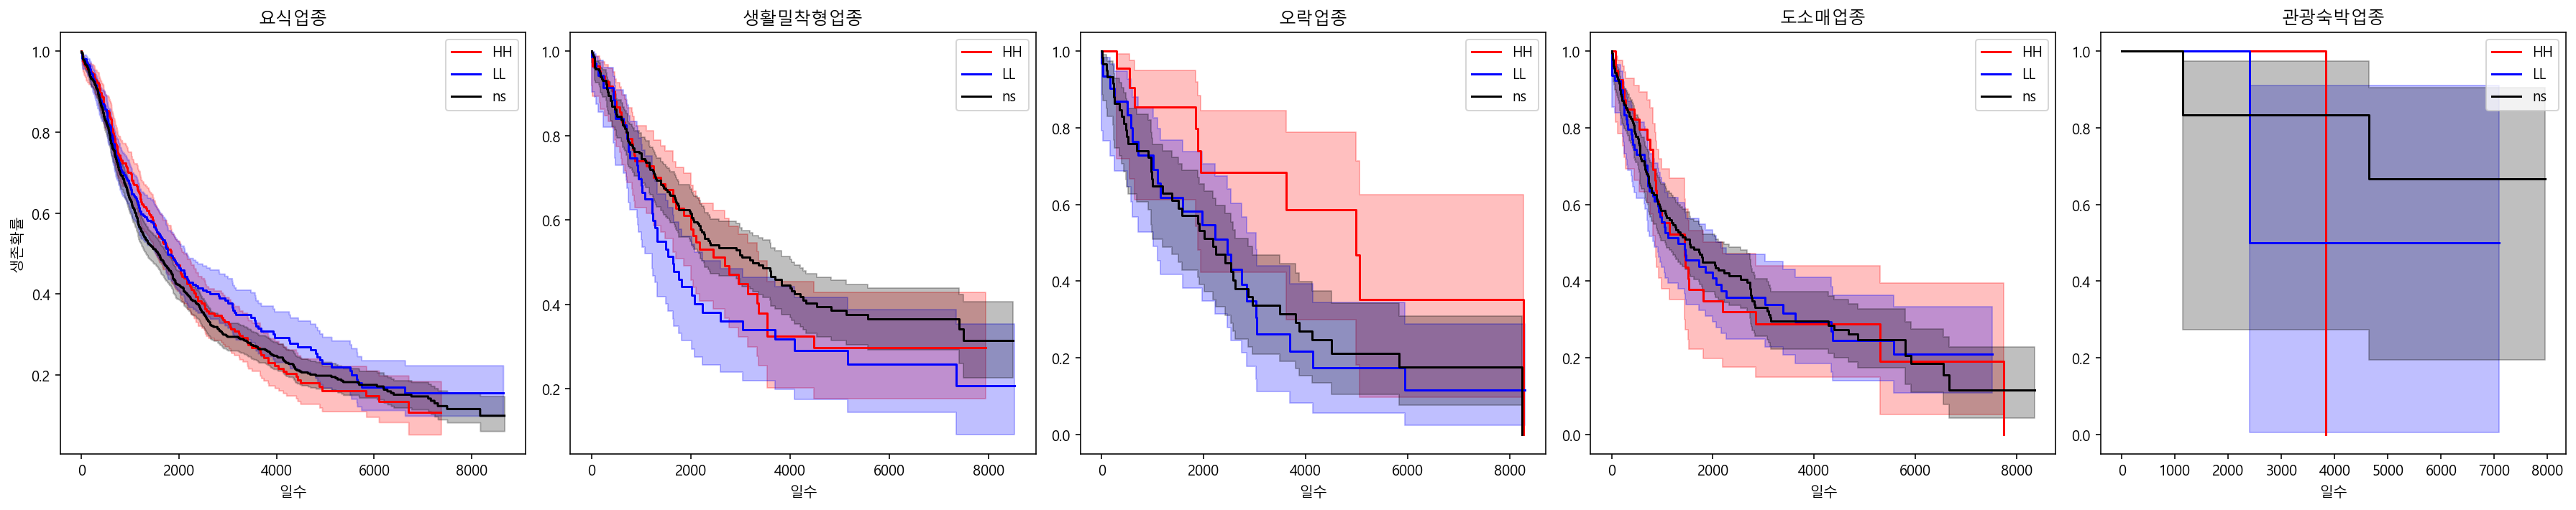

In [303]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()

unique_gubun = geo_df['구분'].unique()
unique_clusters = ['HH', 'LL', 'ns']

colors = {
    'HH': 'red',
    'LL': 'blue',
    'ns': 'black'
}

fig, axes = plt.subplots(nrows=1, ncols=len(unique_gubun), figsize=(5*len(unique_gubun), 5))

for i, gubun in enumerate(unique_gubun):
    ax = axes[i]
    subset_gubun = geo_df[geo_df['구분'] == gubun]
    
    for cluster in unique_clusters:
        subset = subset_gubun[subset_gubun['lisa_cluster'] == cluster]
        
        if len(subset) > 0:
            kmf.fit(subset['생존시간'], event_observed=subset['사건발생'], label=cluster)
            kmf.plot(ax=ax, color=colors[cluster])
    
    ax.set_title(f"{gubun}")
    ax.set_xlabel('일수')
    if i == 0:
        ax.set_ylabel('생존확률')
    else:
        ax.set_ylabel('')

plt.tight_layout()
plt.show()


### 2.3.5. 콕스 비례 위험 모형(Cox Proportional Hazards model)

In [304]:
geo_df

,구분,개방서비스명,업태구분명,인허가일자,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,geometry,생존시간,사건발생,lisa_cluster
0,요식업종,제과점영업,제과점영업,2019-05-20,영업,NaT,충청북도 청주시 상당구 수동 315-24번지 1층,"충청북도 청주시 상당구 대성로 154, 1층 (수동)",POINT (127.48935 36.63900),1625.0,0,ns
1,요식업종,제과점영업,제과점영업,2023-04-03,영업,NaT,충청북도 청주시 상당구 북문로3가 123 청주행정타운코아루휴티스,"충청북도 청주시 상당구 중앙로 80, 근린생활시설동 1층 103,104호 (북문로3...",POINT (127.48594 36.64424),211.0,0,LL
2,요식업종,제과점영업,제과점영업,2020-04-21,영업,NaT,"충청북도 청주시 상당구 북문로3가 44-1번지 106,107,108호","충청북도 청주시 상당구 사직대로361번길 158-10, 106,107,108호 (북...",POINT (127.48456 36.64378),1288.0,0,LL
3,요식업종,제과점영업,제과점영업,2022-02-07,영업,NaT,충청북도 청주시 상당구 대성동 197,"충청북도 청주시 상당구 용담로 31-5, 1층 (대성동)",POINT (127.49190 36.63275),631.0,0,HH
4,요식업종,제과점영업,제과점영업,2019-04-10,영업,NaT,충청북도 청주시 상당구 북문로2가 77-1,"충청북도 청주시 상당구 상당로115번길 23, 1층 (북문로2가)",POINT (127.48578 36.63847),1665.0,0,ns
...,...,...,...,...,...,...,...,...,...,...,...,...
2360,관광숙박업종,숙박업,여관업,2000-03-29,폐업,2003-05-13,충청북도 청주시 상당구 남문로1가 29-8번지,None,POINT (127.48773 36.63052),1140.0,1,ns
2361,관광숙박업종,숙박업,여관업,2001-06-29,폐업,2014-03-14,충청북도 청주시 상당구 북문로2가 27-6번지 27-14,"충청북도 청주시 상당구 교동로3번길 33 (북문로2가,27-14)",POINT (127.48761 36.63878),4641.0,1,ns
2362,관광숙박업종,숙박업,여관업,2003-03-13,폐업,2012-09-26,충청북도 청주시 상당구 서문동 108-1번지,충청북도 청주시 상당구 사직대로362번길 88 (서문동),POINT (127.48424 36.63332),3485.0,1,NaN
2363,관광숙박업종,숙박업,여관업,2005-05-07,폐업,2015-10-30,충청북도 청주시 상당구 북문로2가 116-113번지 (1~6층),"충청북도 청주시 상당구 중앙로 6-12 (북문로2가,(1~6층))",POINT (127.48673 36.63754),3828.0,1,HH


In [305]:
geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   구분            2365 non-null   object        
 1   개방서비스명        2365 non-null   object        
 2   업태구분명         1976 non-null   object        
 3   인허가일자         2365 non-null   datetime64[ns]
 4   상세영업상태명       2365 non-null   object        
 5   폐업일자          1553 non-null   datetime64[ns]
 6   소재지전체주소       2343 non-null   object        
 7   도로명전체주소       1811 non-null   object        
 8   geometry      2365 non-null   geometry      
 9   생존시간          2365 non-null   float64       
 10  사건발생          2365 non-null   int64         
 11  lisa_cluster  2278 non-null   object        
dtypes: datetime64[ns](2), float64(1), geometry(1), int64(1), object(7)
memory usage: 221.8+ KB


#### 2.3.5.1. 공변량 변수 전처리

##### 2.3.5.1.1 격자 데이터

In [306]:
# 필요 데이터 추출
df_cov_grid = merged_grid[['gid', '총매출추정금액_억원', 'geometry']]

# 112신고통계 데이터 복사 및 연도별 신고 합계 계산
df_repo = dataframes['112신고통계'].copy()
df_repo['repo_1822'] = df_repo[['repo_2018', 'repo_2019', 'repo_2020', 'repo_2021', 'repo_2022']].sum(axis=1)

# 데이터 병합
df_cov_grid = df_cov_grid.merge(df_repo[['gid', 'repo_1822']], on='gid', how='left')

# 컬럼 순서 변경
df_cov_grid = df_cov_grid[['gid', '총매출추정금액_억원', 'repo_1822', 'geometry']]

# 컬럼명 변경
df_cov_grid.rename(columns={'총매출추정금액_억원':'총카드매출_억원',
                            'repo_1822':'누적신고건수'}, inplace=True)

df_cov_grid

,gid,총카드매출_억원,누적신고건수,geometry
0,다바993480,26.0962,213.0,"POLYGON ((127.49217 36.62988, 127.49217 36.630..."
1,다바986484,243.6206,503.0,"POLYGON ((127.48434 36.63348, 127.48434 36.634..."
2,다바993479,69.4445,234.0,"POLYGON ((127.49217 36.62898, 127.49217 36.629..."
3,다바992492,42.9745,52.0,"POLYGON ((127.49105 36.64070, 127.49105 36.641..."
4,다바987485,149.6829,192.0,"POLYGON ((127.48546 36.63439, 127.48546 36.635..."
...,...,...,...,...
122,다바990494,4.8558,272.0,"POLYGON ((127.48881 36.64250, 127.48881 36.643..."
123,다바987490,36.0720,65.0,"POLYGON ((127.48546 36.63889, 127.48546 36.639..."
124,다바992487,NaN,151.0,"POLYGON ((127.49105 36.63619, 127.49105 36.637..."
125,다바987489,13.9984,125.0,"POLYGON ((127.48546 36.63799, 127.48546 36.638..."


In [307]:
# 데이터프레임 복사
df_pop_2022 = dataframes['거주인구'].copy()

# 2022년 인구 추출
df_pop_2022 = dataframes['거주인구'][dataframes['거주인구']['year'] == 2022]

# 남녀 인구를 연령대별로 합치기
for i in range(2, 11):  # 연령대는 20대부터 100대까지
    age_group = f'{i}0g'  # 연령대 문자열 생성
    df_pop_2022[age_group] = df_pop_2022[f'm_{age_group}_pop'].fillna(0) + df_pop_2022[f'w_{age_group}_pop'].fillna(0)

# 남녀 구분된 인구수 컬럼 제거
columns_to_keep = ['gid'] + [f'{i}0g' for i in range(2, 11)]
df_pop_2022 = df_pop_2022[columns_to_keep]

# 각 연령대별 컬럼 이름 변경하기
rename_columns = {f'{i}0g': f'정주인구_2022_{i}0대' for i in range(2, 11)}
df_pop_2022.rename(columns=rename_columns, inplace=True)

# 병합
df_cov_grid = df_cov_grid.merge(df_pop_2022, on='gid', how='left')

# 'geometry' 열을 가장 마지막으로 순서 변경
cols = df_cov_grid.columns.tolist()  # 모든 컬럼 이름을 리스트로 가져오기
cols.append(cols.pop(cols.index('geometry')))  # 'geometry' 컬럼을 끝으로 이동

# DataFrame의 컬럼 순서를 새로운 순서로 지정
df_cov_grid = df_cov_grid[cols]

# 결과 출력
df_cov_grid

,gid,총카드매출_억원,누적신고건수,정주인구_2022_20대,정주인구_2022_30대,정주인구_2022_40대,정주인구_2022_50대,정주인구_2022_60대,정주인구_2022_70대,정주인구_2022_80대,정주인구_2022_90대,정주인구_2022_100대,geometry
0,다바993480,26.0962,213.0,29.0,0.0,0.0,0.0,8.0,6.0,0.0,0.0,0.0,"POLYGON ((127.49217 36.62988, 127.49217 36.630..."
1,다바986484,243.6206,503.0,0.0,11.0,0.0,15.0,16.0,0.0,0.0,0.0,0.0,"POLYGON ((127.48434 36.63348, 127.48434 36.634..."
2,다바993479,69.4445,234.0,13.0,9.0,6.0,9.0,6.0,0.0,0.0,0.0,0.0,"POLYGON ((127.49217 36.62898, 127.49217 36.629..."
3,다바992492,42.9745,52.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((127.49105 36.64070, 127.49105 36.641..."
4,다바987485,149.6829,192.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((127.48546 36.63439, 127.48546 36.635..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,다바990494,4.8558,272.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((127.48881 36.64250, 127.48881 36.643..."
123,다바987490,36.0720,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((127.48546 36.63889, 127.48546 36.639..."
124,다바992487,NaN,151.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((127.49105 36.63619, 127.49105 36.637..."
125,다바987489,13.9984,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((127.48546 36.63799, 127.48546 36.638..."


In [308]:
# 격자 데이터 공간조인
gdf_cox = gpd.sjoin(geo_df, df_cov_grid, how="left", op='intersects')

# 컬럼 제거
gdf_cox.drop(columns=['index_right', 'gid'], inplace=True)

gdf_cox

,구분,개방서비스명,업태구분명,인허가일자,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,geometry,생존시간,...,누적신고건수,정주인구_2022_20대,정주인구_2022_30대,정주인구_2022_40대,정주인구_2022_50대,정주인구_2022_60대,정주인구_2022_70대,정주인구_2022_80대,정주인구_2022_90대,정주인구_2022_100대
0,요식업종,제과점영업,제과점영업,2019-05-20,영업,NaT,충청북도 청주시 상당구 수동 315-24번지 1층,"충청북도 청주시 상당구 대성로 154, 1층 (수동)",POINT (127.48935 36.63900),1625.0,...,356.0,18.0,0.0,6.0,7.0,20.0,21.0,14.0,0.0,0.0
1,요식업종,제과점영업,제과점영업,2023-04-03,영업,NaT,충청북도 청주시 상당구 북문로3가 123 청주행정타운코아루휴티스,"충청북도 청주시 상당구 중앙로 80, 근린생활시설동 1층 103,104호 (북문로3...",POINT (127.48594 36.64424),211.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,요식업종,제과점영업,제과점영업,2020-04-21,영업,NaT,"충청북도 청주시 상당구 북문로3가 44-1번지 106,107,108호","충청북도 청주시 상당구 사직대로361번길 158-10, 106,107,108호 (북...",POINT (127.48456 36.64378),1288.0,...,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,요식업종,제과점영업,제과점영업,2022-02-07,영업,NaT,충청북도 청주시 상당구 대성동 197,"충청북도 청주시 상당구 용담로 31-5, 1층 (대성동)",POINT (127.49190 36.63275),631.0,...,269.0,212.0,177.0,168.0,240.0,126.0,83.0,41.0,6.0,0.0
4,요식업종,제과점영업,제과점영업,2019-04-10,영업,NaT,충청북도 청주시 상당구 북문로2가 77-1,"충청북도 청주시 상당구 상당로115번길 23, 1층 (북문로2가)",POINT (127.48578 36.63847),1665.0,...,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360,관광숙박업종,숙박업,여관업,2000-03-29,폐업,2003-05-13,충청북도 청주시 상당구 남문로1가 29-8번지,None,POINT (127.48773 36.63052),1140.0,...,404.0,6.0,0.0,0.0,6.0,0.0,13.0,0.0,0.0,0.0
2361,관광숙박업종,숙박업,여관업,2001-06-29,폐업,2014-03-14,충청북도 청주시 상당구 북문로2가 27-6번지 27-14,"충청북도 청주시 상당구 교동로3번길 33 (북문로2가,27-14)",POINT (127.48761 36.63878),4641.0,...,147.0,7.0,9.0,0.0,7.0,9.0,0.0,0.0,0.0,0.0
2362,관광숙박업종,숙박업,여관업,2003-03-13,폐업,2012-09-26,충청북도 청주시 상당구 서문동 108-1번지,충청북도 청주시 상당구 사직대로362번길 88 (서문동),POINT (127.48424 36.63332),3485.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2363,관광숙박업종,숙박업,여관업,2005-05-07,폐업,2015-10-30,충청북도 청주시 상당구 북문로2가 116-113번지 (1~6층),"충청북도 청주시 상당구 중앙로 6-12 (북문로2가,(1~6층))",POINT (127.48673 36.63754),3828.0,...,164.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [309]:
gdf_cox.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2365 entries, 0 to 2364
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   구분              2365 non-null   object        
 1   개방서비스명          2365 non-null   object        
 2   업태구분명           1976 non-null   object        
 3   인허가일자           2365 non-null   datetime64[ns]
 4   상세영업상태명         2365 non-null   object        
 5   폐업일자            1553 non-null   datetime64[ns]
 6   소재지전체주소         2343 non-null   object        
 7   도로명전체주소         1811 non-null   object        
 8   geometry        2365 non-null   geometry      
 9   생존시간            2365 non-null   float64       
 10  사건발생            2365 non-null   int64         
 11  lisa_cluster    2278 non-null   object        
 12  총카드매출_억원        2111 non-null   float64       
 13  누적신고건수          2278 non-null   float64       
 14  정주인구_2022_20대   2278 non-null   float64       
 

##### 2.3.5.1.2 포인트 데이터

In [311]:
### 분석 범위 포인트 설정

# 좌표계를 미터 단위 좌표계로 변경
study_area_5179 = study_area.to_crs(epsg=5179)

# 1km 버퍼 생성
study_area_5179['geometry'] = study_area_5179.geometry.buffer(500)
study_area_5179 = study_area_5179.to_crs(epsg=4326)

study_area_5179

,geometry
0,"POLYGON ((127.47781 36.63255, 127.47794 36.633..."


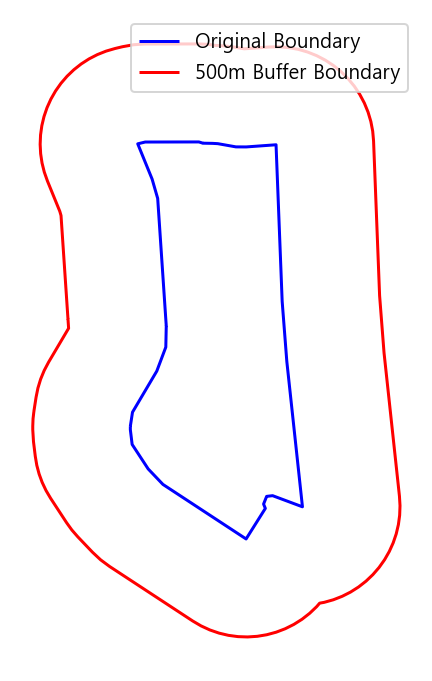

In [452]:
# 시각화
fig, ax = plt.subplots(figsize=(6, 6))

# 원본 도심 경계
study_area.boundary.plot(ax=ax, edgecolor='blue', label='Original Boundary')

# 버퍼를 적용한 도심 경계
study_area_5179.boundary.plot(ax=ax, edgecolor='red', label='500m Buffer Boundary')

# 범례
ax.legend()

# 축 제거
ax.set_axis_off()

plt.show()

In [313]:
# 지오데이터프레임 복사
gdf_bus_st = geodfs['버스정류장현황'].copy()

# 지정된 지역으로 클립
gdf_bus_st = gpd.clip(gdf_bus_st, study_area_5179)

# 승하차 이력 데이터 복사 및 합산
df_bus_pass = dataframes['버스정류장_승하차이력'].copy()
df_bus_pass['bus_pass'] = df_bus_pass[['gnrl_use', 'stdnt_use', 'chld_use', 'othr_use']].sum(axis=1)

# 'bis_id'로 그룹화 후 'bus_pass' 합산
df_bus_pass = df_bus_pass.groupby('bis_id')['bus_pass'].sum().reset_index()

# 데이터 병합
gdf_bus_st = gdf_bus_st.merge(df_bus_pass, on='bis_id', how='left')

# 컬럼순서 변경
gdf_bus_st = gdf_bus_st[['bis_id', 'bus_pass', 'geometry']]

# 컬럼명 변경
gdf_bus_st.rename(columns={'bus_pass':'누적버스승하차인원'}, inplace=True)

gdf_bus_st.head()


,bis_id,누적버스승하차인원,geometry
0,4362581,21392.0,POINT (127.48782 36.62537)
1,4391151,17951.0,POINT (127.48608 36.62637)
2,4362601,11519.0,POINT (127.48300 36.62825)
3,4362621,11934.0,POINT (127.47858 36.62898)
4,4362801,5262.0,POINT (127.47927 36.64335)


In [314]:
from shapely.ops import nearest_points
import numpy as np

# gdf_cox의 각 지점에 대한 거리 가중치 계산 함수
def calculate_distance_weights(row, gdf_bus_st, column_name):
    # gdf_cox의 현재 지점과 gdf_bus_st의 모든 지점 사이의 거리 계산
    distances = gdf_bus_st.geometry.apply(lambda x: row.geometry.distance(x))
    
    # 거리의 제곱의 역수를 가중치로 계산
    weights = 1 / distances**2
    
    # 가중치에 '누적버스승하차인원' 값을 곱하고 합산
    weighted_values = weights * gdf_bus_st[column_name]
    
    return weighted_values.sum()

# '누적버스승하차인원' 열을 거리 가중치로 추가
gdf_cox['누적버스승하차인원'] = gdf_cox.apply(calculate_distance_weights, axis=1, gdf_bus_st=gdf_bus_st, column_name='누적버스승하차인원')
gdf_cox

,구분,개방서비스명,업태구분명,인허가일자,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,geometry,생존시간,...,정주인구_2022_20대,정주인구_2022_30대,정주인구_2022_40대,정주인구_2022_50대,정주인구_2022_60대,정주인구_2022_70대,정주인구_2022_80대,정주인구_2022_90대,정주인구_2022_100대,누적버스승하차인원
0,요식업종,제과점영업,제과점영업,2019-05-20,영업,NaT,충청북도 청주시 상당구 수동 315-24번지 1층,"충청북도 청주시 상당구 대성로 154, 1층 (수동)",POINT (127.48935 36.63900),1625.0,...,18.0,0.0,6.0,7.0,20.0,21.0,14.0,0.0,0.0,6.133780e+11
1,요식업종,제과점영업,제과점영업,2023-04-03,영업,NaT,충청북도 청주시 상당구 북문로3가 123 청주행정타운코아루휴티스,"충청북도 청주시 상당구 중앙로 80, 근린생활시설동 1층 103,104호 (북문로3...",POINT (127.48594 36.64424),211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.579323e+10
2,요식업종,제과점영업,제과점영업,2020-04-21,영업,NaT,"충청북도 청주시 상당구 북문로3가 44-1번지 106,107,108호","충청북도 청주시 상당구 사직대로361번길 158-10, 106,107,108호 (북...",POINT (127.48456 36.64378),1288.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.525854e+10
3,요식업종,제과점영업,제과점영업,2022-02-07,영업,NaT,충청북도 청주시 상당구 대성동 197,"충청북도 청주시 상당구 용담로 31-5, 1층 (대성동)",POINT (127.49190 36.63275),631.0,...,212.0,177.0,168.0,240.0,126.0,83.0,41.0,6.0,0.0,4.355909e+11
4,요식업종,제과점영업,제과점영업,2019-04-10,영업,NaT,충청북도 청주시 상당구 북문로2가 77-1,"충청북도 청주시 상당구 상당로115번길 23, 1층 (북문로2가)",POINT (127.48578 36.63847),1665.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.730040e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360,관광숙박업종,숙박업,여관업,2000-03-29,폐업,2003-05-13,충청북도 청주시 상당구 남문로1가 29-8번지,None,POINT (127.48773 36.63052),1140.0,...,6.0,0.0,0.0,6.0,0.0,13.0,0.0,0.0,0.0,1.395866e+11
2361,관광숙박업종,숙박업,여관업,2001-06-29,폐업,2014-03-14,충청북도 청주시 상당구 북문로2가 27-6번지 27-14,"충청북도 청주시 상당구 교동로3번길 33 (북문로2가,27-14)",POINT (127.48761 36.63878),4641.0,...,7.0,9.0,0.0,7.0,9.0,0.0,0.0,0.0,0.0,2.734692e+11
2362,관광숙박업종,숙박업,여관업,2003-03-13,폐업,2012-09-26,충청북도 청주시 상당구 서문동 108-1번지,충청북도 청주시 상당구 사직대로362번길 88 (서문동),POINT (127.48424 36.63332),3485.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.749095e+10
2363,관광숙박업종,숙박업,여관업,2005-05-07,폐업,2015-10-30,충청북도 청주시 상당구 북문로2가 116-113번지 (1~6층),"충청북도 청주시 상당구 중앙로 6-12 (북문로2가,(1~6층))",POINT (127.48673 36.63754),3828.0,...,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.887165e+11


In [316]:
# 데이터 프레임 복사 및 공시지가 평균 계산
gdf_landprice = dataframes['개별공시지가'].copy()
gdf_landprice = gdf_landprice.groupby('unique_no')['land_value'].mean().reset_index()

# unique_no 컬럼을 문자열로 변환
gdf_landprice['unique_no'] = gdf_landprice['unique_no'].astype('str')

# 컬럼명 변경: 'unique_no'를 'pnu'로
gdf_landprice.rename(columns={'unique_no': 'pnu'}, inplace=True)

# 건물노후도 데이터 프레임 복사 및 필요한 컬럼 선택
gdf_bldg = dataframes['건물노후도'].copy()
gdf_bldg = gdf_bldg[['pnu', 'old_year', 'geometry']]

# 두 데이터 프레임 병합
gdf_bldg = gdf_bldg.merge(gdf_landprice, on='pnu', how='left')

# 컬럼순서 변경
gdf_bldg = gdf_bldg[['pnu', 'old_year', 'land_value', 'geometry']]

# 컬럼명 변경
gdf_bldg.rename(columns={'old_year':'건물노후도',
                          'land_value':'공시지가평균'}, inplace=True)

# clip
gdf_bldg = gpd.clip(gdf_bldg, study_area_5179)

gdf_bldg


,pnu,건물노후도,공시지가평균,geometry
0,4311110100100020001,46.0,892642.857143,"POLYGON ((127.48673 36.64485, 127.48658 36.644..."
1,4311110100100020002,13.0,811514.285714,"POLYGON ((127.48657 36.64485, 127.48658 36.644..."
2,4311110100100020003,13.0,811514.285714,"POLYGON ((127.48641 36.64489, 127.48641 36.644..."
3,4311110100100020004,46.0,628071.428571,"POLYGON ((127.48667 36.64474, 127.48668 36.644..."
4,4311110100100020004,NaN,628071.428571,"POLYGON ((127.48666 36.64472, 127.48666 36.644..."
...,...,...,...,...
65134,4311410100107860002,21.0,789928.571429,"POLYGON ((127.48153 36.64841, 127.48154 36.648..."
65135,4311410100107870003,30.0,789928.571429,"POLYGON ((127.48151 36.64875, 127.48151 36.648..."
65137,4311410100107870004,29.0,797942.857143,"POLYGON ((127.48161 36.64862, 127.48164 36.648..."
65138,4311410100107880002,2.0,734085.714286,"POLYGON ((127.48132 36.64886, 127.48123 36.648..."


In [317]:
# 중복 행이 있는지 확인
duplicates = gdf_bldg.duplicated(keep=False)

# 중복 행이 있다면 True 값을 가지는 행만 출력
gdf_bldg[duplicates]

,pnu,건물노후도,공시지가평균,geometry
1556,4311110800100330008,7.0,6.460143e+05,"POLYGON ((127.49207 36.63051, 127.49215 36.630..."
1557,4311110800100330008,7.0,6.460143e+05,"POLYGON ((127.49207 36.63051, 127.49215 36.630..."
23753,4311210100100120012,13.0,1.314857e+06,"POLYGON ((127.47905 36.63485, 127.47905 36.634..."
23754,4311210100100120012,13.0,1.314857e+06,"POLYGON ((127.47905 36.63485, 127.47905 36.634..."
61189,4311410100101310006,6.0,6.557571e+05,"POLYGON ((127.48857 36.64670, 127.48864 36.646..."
61190,4311410100101310006,6.0,6.557571e+05,"POLYGON ((127.48857 36.64670, 127.48864 36.646..."
61191,4311410100101310006,6.0,6.557571e+05,"POLYGON ((127.48857 36.64670, 127.48864 36.646..."


In [318]:
# 모든 열이 같은 중복 행 제거
gdf_bldg = gdf_bldg.drop_duplicates(keep=False)

gdf_bldg

,pnu,건물노후도,공시지가평균,geometry
0,4311110100100020001,46.0,892642.857143,"POLYGON ((127.48673 36.64485, 127.48658 36.644..."
1,4311110100100020002,13.0,811514.285714,"POLYGON ((127.48657 36.64485, 127.48658 36.644..."
2,4311110100100020003,13.0,811514.285714,"POLYGON ((127.48641 36.64489, 127.48641 36.644..."
3,4311110100100020004,46.0,628071.428571,"POLYGON ((127.48667 36.64474, 127.48668 36.644..."
4,4311110100100020004,NaN,628071.428571,"POLYGON ((127.48666 36.64472, 127.48666 36.644..."
...,...,...,...,...
65134,4311410100107860002,21.0,789928.571429,"POLYGON ((127.48153 36.64841, 127.48154 36.648..."
65135,4311410100107870003,30.0,789928.571429,"POLYGON ((127.48151 36.64875, 127.48151 36.648..."
65137,4311410100107870004,29.0,797942.857143,"POLYGON ((127.48161 36.64862, 127.48164 36.648..."
65138,4311410100107880002,2.0,734085.714286,"POLYGON ((127.48132 36.64886, 127.48123 36.648..."


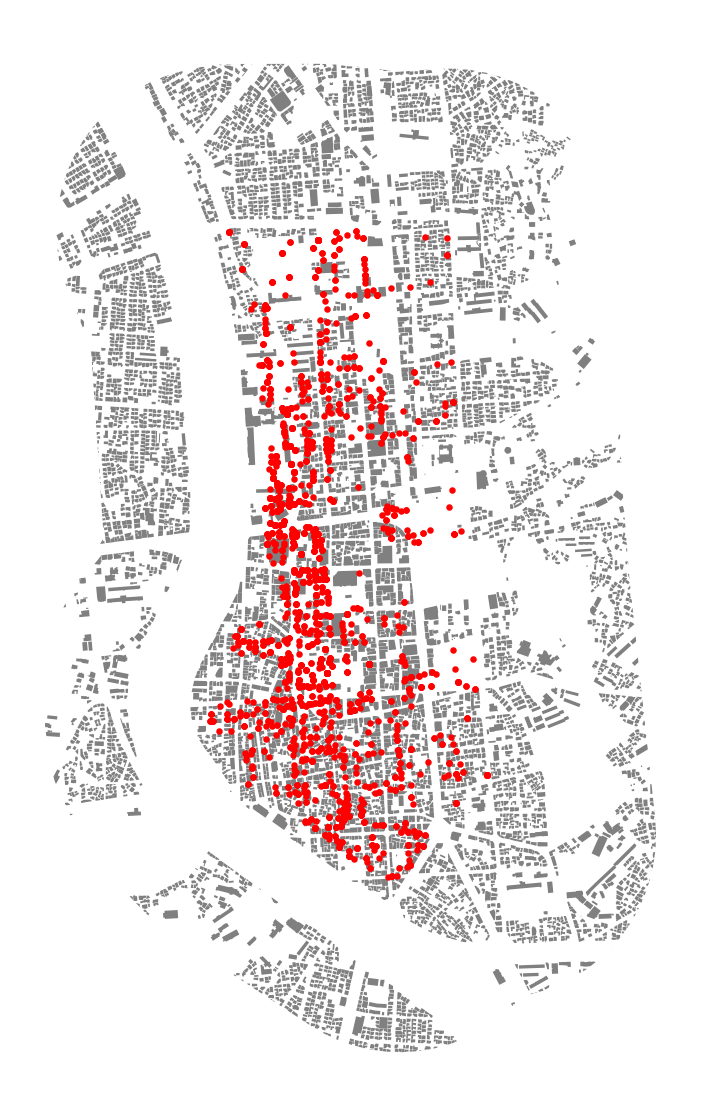

In [321]:
import matplotlib.pyplot as plt

# gdf_bldg
ax = gdf_bldg.plot(color='grey', figsize=(10, 10), zorder=1)

# geo_df
gdf_cox.plot(ax=ax, color='red', markersize=5, zorder=2)

# 축 제거
plt.axis('off')

plt.show()


In [322]:
# 공간 조인
gdf_cox = gpd.sjoin(gdf_cox, gdf_bldg[['geometry', '건물노후도', '공시지가평균']], how="left", op='intersects')

# 컬럼 제거
gdf_cox.drop(columns=['index_right'], inplace=True)

gdf_cox

,구분,개방서비스명,업태구분명,인허가일자,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,geometry,생존시간,...,정주인구_2022_40대,정주인구_2022_50대,정주인구_2022_60대,정주인구_2022_70대,정주인구_2022_80대,정주인구_2022_90대,정주인구_2022_100대,누적버스승하차인원,건물노후도,공시지가평균
0,요식업종,제과점영업,제과점영업,2019-05-20,영업,NaT,충청북도 청주시 상당구 수동 315-24번지 1층,"충청북도 청주시 상당구 대성로 154, 1층 (수동)",POINT (127.48935 36.63900),1625.0,...,6.0,7.0,20.0,21.0,14.0,0.0,0.0,6.133780e+11,45.0,826542.857143
1,요식업종,제과점영업,제과점영업,2023-04-03,영업,NaT,충청북도 청주시 상당구 북문로3가 123 청주행정타운코아루휴티스,"충청북도 청주시 상당구 중앙로 80, 근린생활시설동 1층 103,104호 (북문로3...",POINT (127.48594 36.64424),211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.579323e+10,NaN,NaN
2,요식업종,제과점영업,제과점영업,2020-04-21,영업,NaT,"충청북도 청주시 상당구 북문로3가 44-1번지 106,107,108호","충청북도 청주시 상당구 사직대로361번길 158-10, 106,107,108호 (북...",POINT (127.48456 36.64378),1288.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.525854e+10,15.0,543885.714286
3,요식업종,제과점영업,제과점영업,2022-02-07,영업,NaT,충청북도 청주시 상당구 대성동 197,"충청북도 청주시 상당구 용담로 31-5, 1층 (대성동)",POINT (127.49190 36.63275),631.0,...,168.0,240.0,126.0,83.0,41.0,6.0,0.0,4.355909e+11,NaN,NaN
4,요식업종,제과점영업,제과점영업,2019-04-10,영업,NaT,충청북도 청주시 상당구 북문로2가 77-1,"충청북도 청주시 상당구 상당로115번길 23, 1층 (북문로2가)",POINT (127.48578 36.63847),1665.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.730040e+11,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360,관광숙박업종,숙박업,여관업,2000-03-29,폐업,2003-05-13,충청북도 청주시 상당구 남문로1가 29-8번지,None,POINT (127.48773 36.63052),1140.0,...,0.0,6.0,0.0,13.0,0.0,0.0,0.0,1.395866e+11,31.0,573171.428571
2361,관광숙박업종,숙박업,여관업,2001-06-29,폐업,2014-03-14,충청북도 청주시 상당구 북문로2가 27-6번지 27-14,"충청북도 청주시 상당구 교동로3번길 33 (북문로2가,27-14)",POINT (127.48761 36.63878),4641.0,...,0.0,7.0,9.0,0.0,0.0,0.0,0.0,2.734692e+11,NaN,NaN
2362,관광숙박업종,숙박업,여관업,2003-03-13,폐업,2012-09-26,충청북도 청주시 상당구 서문동 108-1번지,충청북도 청주시 상당구 사직대로362번길 88 (서문동),POINT (127.48424 36.63332),3485.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.749095e+10,42.0,826214.285714
2363,관광숙박업종,숙박업,여관업,2005-05-07,폐업,2015-10-30,충청북도 청주시 상당구 북문로2가 116-113번지 (1~6층),"충청북도 청주시 상당구 중앙로 6-12 (북문로2가,(1~6층))",POINT (127.48673 36.63754),3828.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.887165e+11,NaN,NaN


In [323]:
gdf_cox.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2365 entries, 0 to 2364
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   구분              2365 non-null   object        
 1   개방서비스명          2365 non-null   object        
 2   업태구분명           1976 non-null   object        
 3   인허가일자           2365 non-null   datetime64[ns]
 4   상세영업상태명         2365 non-null   object        
 5   폐업일자            1553 non-null   datetime64[ns]
 6   소재지전체주소         2343 non-null   object        
 7   도로명전체주소         1811 non-null   object        
 8   geometry        2365 non-null   geometry      
 9   생존시간            2365 non-null   float64       
 10  사건발생            2365 non-null   int64         
 11  lisa_cluster    2278 non-null   object        
 12  총카드매출_억원        2111 non-null   float64       
 13  누적신고건수          2278 non-null   float64       
 14  정주인구_2022_20대   2278 non-null   float64       
 

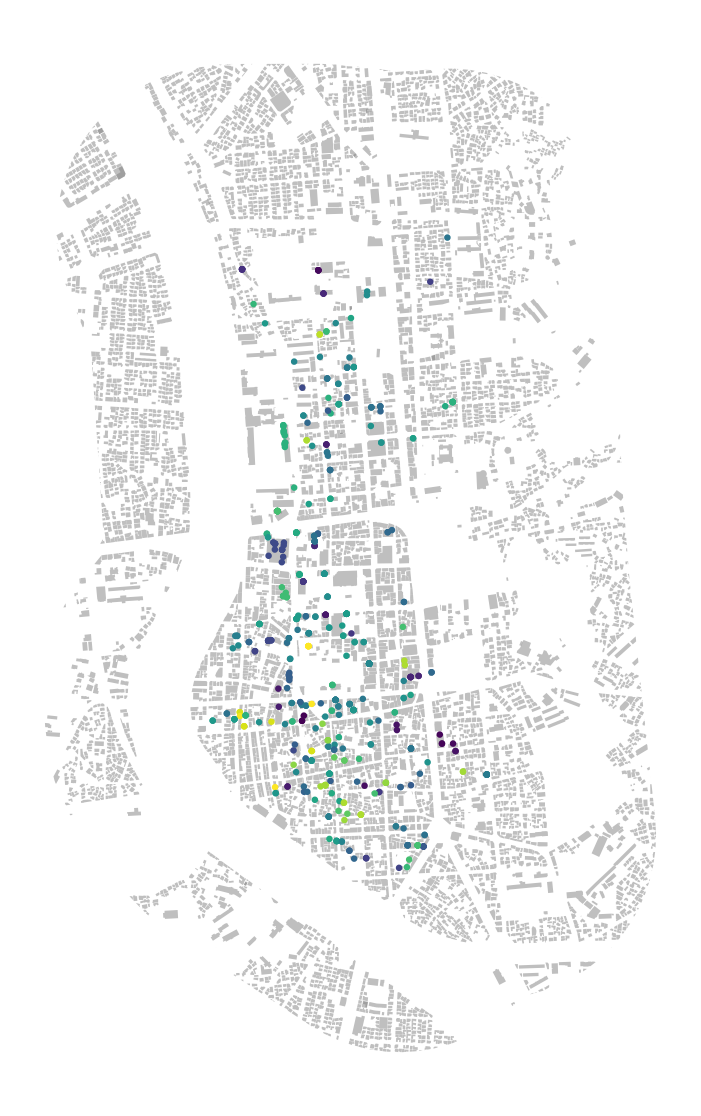

In [328]:
import matplotlib.pyplot as plt

# Plot 설정
fig, ax = plt.subplots(figsize=(10, 10))

# plot
gdf_bldg.plot(ax=ax, color='grey', alpha=0.5)
gdf_cox.plot(ax=ax, column='건물노후도', markersize=5)

# 축 제거
ax.axis('off')

# 플롯 표시
plt.show()


In [395]:
### 건물 폴리곤으로 공간조인 결과 데이터의 약 75% 손실 발생
### 필지 데이터로 전환하여 공간조인 필요
gdf_cox = gdf_cox.drop(gdf_cox.columns[24:], axis=1)
gdf_cox.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2365 entries, 0 to 2364
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   구분              2365 non-null   object        
 1   개방서비스명          2365 non-null   object        
 2   업태구분명           1976 non-null   object        
 3   인허가일자           2365 non-null   datetime64[ns]
 4   상세영업상태명         2365 non-null   object        
 5   폐업일자            1553 non-null   datetime64[ns]
 6   소재지전체주소         2343 non-null   object        
 7   도로명전체주소         1811 non-null   object        
 8   geometry        2365 non-null   geometry      
 9   생존시간            2365 non-null   float64       
 10  사건발생            2365 non-null   int64         
 11  lisa_cluster    2278 non-null   object        
 12  총카드매출_억원        2111 non-null   float64       
 13  누적신고건수          2278 non-null   float64       
 14  정주인구_2022_20대   2278 non-null   float64       
 

In [396]:
# gdf_land 데이터프레임을 GeoJSON 파일로부터 읽기
gdf_land = gpd.read_file(source_folder + '/output/gdf_land.geojson', driver='GeoJSON')

# 데이터 병합
gdf_land = gdf_land.merge(gdf_landprice, on='pnu', how='left')

# 컬럼명 변경
gdf_land.rename(columns={'land_value':'평균공시지가'}, inplace=True)

# 건물노후도 데이터프레임을 복사하고 pnu, old_year, geometry 컬럼만 선택
gdf_bldg = dataframes['건물노후도'].copy()
gdf_bldg = gdf_bldg[['pnu', 'old_year', 'geometry']]

# 데이터프레임 클리핑
gdf_bldg = gpd.clip(gdf_bldg, study_area_5179)

# 결측치, 모든 열이 같은 중복 행 제거
gdf_bldg = gdf_bldg.drop_duplicates(keep=False)
gdf_bldg = gdf_bldg.dropna()

# gdf_bldg에서 pnu 별로 old_year의 평균을 계산
gdf_bldg_groupby = gdf_bldg.groupby('pnu')['old_year'].mean().reset_index()

# 컬럼명 변경
gdf_bldg_groupby.rename(columns={'old_year':'평균건물노후도'}, inplace=True)

# 데이터 병합
gdf_land = gdf_land.merge(gdf_bldg_groupby, on='pnu', how='left')

# 공간 조인
gdf_cox = gpd.sjoin(gdf_cox, gdf_land, how="left", op='intersects')

# 컬럼 제거
gdf_cox.drop(columns=['index_right', 'pnu'], inplace=True)

gdf_cox

,구분,개방서비스명,업태구분명,인허가일자,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,geometry,생존시간,...,정주인구_2022_40대,정주인구_2022_50대,정주인구_2022_60대,정주인구_2022_70대,정주인구_2022_80대,정주인구_2022_90대,정주인구_2022_100대,누적버스승하차인원,평균공시지가,평균건물노후도
0,요식업종,제과점영업,제과점영업,2019-05-20,영업,NaT,충청북도 청주시 상당구 수동 315-24번지 1층,"충청북도 청주시 상당구 대성로 154, 1층 (수동)",POINT (127.48935 36.63900),1625.0,...,6.0,7.0,20.0,21.0,14.0,0.0,0.0,6.133780e+11,8.265429e+05,NaN
1,요식업종,제과점영업,제과점영업,2023-04-03,영업,NaT,충청북도 청주시 상당구 북문로3가 123 청주행정타운코아루휴티스,"충청북도 청주시 상당구 중앙로 80, 근린생활시설동 1층 103,104호 (북문로3...",POINT (127.48594 36.64424),211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.579323e+10,5.451714e+05,NaN
2,요식업종,제과점영업,제과점영업,2020-04-21,영업,NaT,"충청북도 청주시 상당구 북문로3가 44-1번지 106,107,108호","충청북도 청주시 상당구 사직대로361번길 158-10, 106,107,108호 (북...",POINT (127.48456 36.64378),1288.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.525854e+10,5.438857e+05,15.000000
3,요식업종,제과점영업,제과점영업,2022-02-07,영업,NaT,충청북도 청주시 상당구 대성동 197,"충청북도 청주시 상당구 용담로 31-5, 1층 (대성동)",POINT (127.49190 36.63275),631.0,...,168.0,240.0,126.0,83.0,41.0,6.0,0.0,4.355909e+11,1.606000e+06,NaN
4,요식업종,제과점영업,제과점영업,2019-04-10,영업,NaT,충청북도 청주시 상당구 북문로2가 77-1,"충청북도 청주시 상당구 상당로115번길 23, 1층 (북문로2가)",POINT (127.48578 36.63847),1665.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.730040e+11,4.459857e+05,37.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360,관광숙박업종,숙박업,여관업,2000-03-29,폐업,2003-05-13,충청북도 청주시 상당구 남문로1가 29-8번지,None,POINT (127.48773 36.63052),1140.0,...,0.0,6.0,0.0,13.0,0.0,0.0,0.0,1.395866e+11,5.731714e+05,31.000000
2361,관광숙박업종,숙박업,여관업,2001-06-29,폐업,2014-03-14,충청북도 청주시 상당구 북문로2가 27-6번지 27-14,"충청북도 청주시 상당구 교동로3번길 33 (북문로2가,27-14)",POINT (127.48761 36.63878),4641.0,...,0.0,7.0,9.0,0.0,0.0,0.0,0.0,2.734692e+11,2.490857e+05,NaN
2362,관광숙박업종,숙박업,여관업,2003-03-13,폐업,2012-09-26,충청북도 청주시 상당구 서문동 108-1번지,충청북도 청주시 상당구 사직대로362번길 88 (서문동),POINT (127.48424 36.63332),3485.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.749095e+10,8.262143e+05,45.500000
2363,관광숙박업종,숙박업,여관업,2005-05-07,폐업,2015-10-30,충청북도 청주시 상당구 북문로2가 116-113번지 (1~6층),"충청북도 청주시 상당구 중앙로 6-12 (북문로2가,(1~6층))",POINT (127.48673 36.63754),3828.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.887165e+11,9.796714e+05,36.666667


In [392]:
# 원본 데이터 이름
datasets = ['시장현황', '주차장현황', '공원현황', '학교현황', '어린이집_유치원현황', '유적지_문화재현황', '불법주정차단속통계']

# 새로운 딕셔너리 생성
clipped_geodfs = {}

# 각 데이터를 클립하여 새로운 딕셔너리에 저장
for dataset in datasets:
    clipped_geodfs[dataset] = gpd.clip(geodfs[dataset].copy(), study_area_5179)


In [399]:
from shapely.ops import nearest_points
import numpy as np

# 각 데이터셋에 대한 가중치를 계산하고, gdf_cox에 새로운 열로 추가하는 함수
def calculate_weighted_column(dataset_name, column_name):
    # gdf_cox의 각 지점에 대한 거리 가중치 계산 함수
    def calculate_distance_weights(row):
        # gdf_cox의 현재 지점과 선택된 데이터셋의 모든 지점 사이의 거리 계산
        distances = clipped_geodfs[dataset_name].geometry.apply(lambda x: row.geometry.distance(x))
        
        # 거리의 제곱의 역수를 가중치로 계산
        weights = 1 / distances**2
        
        # 가중치에 선택된 컬럼 값(또는 1)을 곱하고 합산
        if column_name is not None:
            weighted_values = weights * clipped_geodfs[dataset_name][column_name]
        else:
            weighted_values = weights
        
        return weighted_values.sum()
    
    # 계산된 가중치를 gdf_cox에 새로운 열로 추가
    gdf_cox[f'{dataset_name}'] = gdf_cox.apply(calculate_distance_weights, axis=1)

# 데이터셋과 컬럼 매핑
dataset_columns = {
    '시장현황': 'area',
    '주차장현황': 'slots',
    '공원현황': None,
    '학교현황': None,
    '어린이집_유치원현황': None,
    '유적지_문화재현황': None,
    '불법주정차단속통계': 'cd_cnt'
}

# 각 데이터셋에 대해 거리 가중치 계산 수행
for dataset_name, column_name in dataset_columns.items():
    calculate_weighted_column(dataset_name, column_name)

# 결과 확인
gdf_cox


,구분,개방서비스명,업태구분명,인허가일자,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,geometry,생존시간,...,누적버스승하차인원,평균공시지가,평균건물노후도,시장현황,주차장현황,공원현황,학교현황,어린이집_유치원현황,유적지_문화재현황,불법주정차단속통계
0,요식업종,제과점영업,제과점영업,2019-05-20,영업,NaT,충청북도 청주시 상당구 수동 315-24번지 1층,"충청북도 청주시 상당구 대성로 154, 1층 (수동)",POINT (127.48935 36.63900),1625.0,...,6.133780e+11,8.265429e+05,NaN,4.288801e+10,8.402908e+07,2.407160e+06,2.539595e+05,4.356679e+05,6.668505e+05,5.893306e+08
1,요식업종,제과점영업,제과점영업,2023-04-03,영업,NaT,충청북도 청주시 상당구 북문로3가 123 청주행정타운코아루휴티스,"충청북도 청주시 상당구 중앙로 80, 근린생활시설동 1층 103,104호 (북문로3...",POINT (127.48594 36.64424),211.0,...,5.579323e+10,5.451714e+05,NaN,2.226938e+09,1.003559e+08,3.055307e+05,1.332936e+06,6.042543e+05,3.290918e+05,1.988833e+07
2,요식업종,제과점영업,제과점영업,2020-04-21,영업,NaT,"충청북도 청주시 상당구 북문로3가 44-1번지 106,107,108호","충청북도 청주시 상당구 사직대로361번길 158-10, 106,107,108호 (북...",POINT (127.48456 36.64378),1288.0,...,4.525854e+10,5.438857e+05,15.000000,1.722992e+09,2.492609e+08,2.684694e+05,7.946819e+05,6.326168e+05,3.953573e+05,1.906355e+07
3,요식업종,제과점영업,제과점영업,2022-02-07,영업,NaT,충청북도 청주시 상당구 대성동 197,"충청북도 청주시 상당구 용담로 31-5, 1층 (대성동)",POINT (127.49190 36.63275),631.0,...,4.355909e+11,1.606000e+06,NaN,2.781546e+09,3.434696e+07,4.148422e+05,1.614812e+05,4.524193e+06,1.614843e+06,6.193547e+07
4,요식업종,제과점영업,제과점영업,2019-04-10,영업,NaT,충청북도 청주시 상당구 북문로2가 77-1,"충청북도 청주시 상당구 상당로115번길 23, 1층 (북문로2가)",POINT (127.48578 36.63847),1665.0,...,1.730040e+11,4.459857e+05,37.250000,2.363560e+09,9.446343e+07,4.600668e+05,1.119953e+07,4.545418e+05,6.164834e+05,1.222072e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360,관광숙박업종,숙박업,여관업,2000-03-29,폐업,2003-05-13,충청북도 청주시 상당구 남문로1가 29-8번지,None,POINT (127.48773 36.63052),1140.0,...,1.395866e+11,5.731714e+05,31.000000,1.311177e+10,3.945604e+07,4.073130e+05,2.324817e+05,2.136326e+05,2.172030e+06,5.430608e+07
2361,관광숙박업종,숙박업,여관업,2001-06-29,폐업,2014-03-14,충청북도 청주시 상당구 북문로2가 27-6번지 27-14,"충청북도 청주시 상당구 교동로3번길 33 (북문로2가,27-14)",POINT (127.48761 36.63878),4641.0,...,2.734692e+11,2.490857e+05,NaN,4.046280e+09,7.043725e+07,1.508356e+06,4.456627e+05,4.104296e+05,6.428371e+05,3.127915e+08
2362,관광숙박업종,숙박업,여관업,2003-03-13,폐업,2012-09-26,충청북도 청주시 상당구 서문동 108-1번지,충청북도 청주시 상당구 사직대로362번길 88 (서문동),POINT (127.48424 36.63332),3485.0,...,7.749095e+10,8.262143e+05,45.500000,4.915780e+09,1.701495e+08,4.305117e+05,2.322615e+05,2.580616e+05,8.307858e+05,8.146021e+07
2363,관광숙박업종,숙박업,여관업,2005-05-07,폐업,2015-10-30,충청북도 청주시 상당구 북문로2가 116-113번지 (1~6층),"충청북도 청주시 상당구 중앙로 6-12 (북문로2가,(1~6층))",POINT (127.48673 36.63754),3828.0,...,4.887165e+11,9.796714e+05,36.666667,3.048847e+09,3.415044e+08,5.159990e+05,5.726905e+05,3.246468e+05,7.468421e+05,7.485782e+08


In [412]:
from shapely import wkt

# 데이터프레임에서 컬럼 0부터 14까지 삭제
df_liv_pop_cov = df_liv_pop.drop(columns=df_liv_pop.columns[0:15])

# clip
df_liv_pop_cov = gpd.clip(df_liv_pop_cov, study_area_5179)

# 'geometry' 컬럼을 문자열로 변환
df_liv_pop_cov['geometry_str'] = df_liv_pop_cov['geometry'].apply(lambda x: str(x))

# 'geometry_str'을 기준으로 그룹화하고, 남은 컬럼들의 합을 구하기
df_liv_pop_cov_groupby = df_liv_pop_cov.groupby('geometry_str').sum().reset_index()

# 컬럼 이름 변경
rename_dict = {
    'total_pop': '누적유동인구_전체',
    '10g_pop': '누적유동인구_10대',
    '20g_pop': '누적유동인구_20대',
    '30g_pop': '누적유동인구_30대',
    '40g_pop': '누적유동인구_40대',
    '50g_pop': '누적유동인구_50대',
    '60g_pop': '누적유동인구_60대이상'
}

df_liv_pop_cov_groupby.rename(columns=rename_dict, inplace=True)

# 'geometry_str' 컬럼을 'geometry'로 이름 변경
df_liv_pop_cov_groupby.rename(columns={'geometry_str': 'geometry'}, inplace=True)

# 문자열을 실제 지오메트리 객체로 변환
df_liv_pop_cov_groupby['geometry'] = df_liv_pop_cov_groupby['geometry'].apply(wkt.loads)

# GeoDataFrame으로 변환
df_liv_pop_cov_groupby = gpd.GeoDataFrame(df_liv_pop_cov_groupby, geometry='geometry')

# 변경된 데이터프레임 확인
df_liv_pop_cov_groupby


,geometry,누적유동인구_전체,누적유동인구_10대,누적유동인구_20대,누적유동인구_30대,누적유동인구_40대,누적유동인구_50대,누적유동인구_60대이상
0,POINT (127.47801 36.63330),3174.38,134.64,406.53,425.20,600.30,732.82,874.89
1,POINT (127.47801 36.63285),146.59,8.39,16.89,19.97,27.00,34.61,39.73
2,POINT (127.47801 36.63239),395.34,19.94,38.89,54.12,76.72,97.67,108.00
3,POINT (127.47801 36.63194),464.85,18.84,49.02,67.05,91.70,120.16,118.08
4,POINT (127.47801 36.63149),161.42,6.10,16.51,22.76,31.90,42.44,41.71
...,...,...,...,...,...,...,...,...
1869,POINT (127.49814 36.62609),617.62,38.63,61.47,72.83,123.76,144.57,176.36
1870,POINT (127.49870 36.62879),736.38,43.09,68.21,94.17,156.66,172.08,202.17
1871,POINT (127.49870 36.62834),295.69,22.75,29.15,38.51,63.03,65.71,76.54
1872,POINT (127.49870 36.62789),349.32,21.21,31.39,43.56,75.97,83.43,93.76


In [414]:
from shapely.ops import nearest_points
import numpy as np
import pandas as pd

# gdf_cox의 각 지점에 대한 거리 가중치 계산 함수
def calculate_distance_weights(row, df_grouped, column_name):
    # df_grouped의 모든 지점 사이의 거리 계산
    distances = df_grouped.geometry.apply(lambda x: row.geometry.distance(x))
    
    # 거리의 제곱의 역수를 가중치로 계산
    weights = 1 / distances**2
    
    # 가중치에 컬럼 값을 곱하고 합산
    weighted_values = weights * df_grouped[column_name]
    
    return weighted_values.sum()

# 관련 컬럼들에 대해 거리 가중치 계산을 반복적으로 수행
columns_to_calculate = [
    '누적유동인구_전체', '누적유동인구_10대', '누적유동인구_20대', 
    '누적유동인구_30대', '누적유동인구_40대', '누적유동인구_50대', '누적유동인구_60대이상'
]

# gdf_cox 데이터프레임에 새로운 가중치 컬럼들을 추가
for column in columns_to_calculate:
    gdf_cox[column] = gdf_cox.apply(
        calculate_distance_weights, 
        axis=1, 
        df_grouped=df_liv_pop_cov_groupby, 
        column_name=column
    )

# 결과 확인
gdf_cox


,구분,개방서비스명,업태구분명,인허가일자,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,geometry,생존시간,...,어린이집_유치원현황,유적지_문화재현황,불법주정차단속통계,누적유동인구_전체,누적유동인구_10대,누적유동인구_20대,누적유동인구_30대,누적유동인구_40대,누적유동인구_50대,누적유동인구_60대이상
0,요식업종,제과점영업,제과점영업,2019-05-20,영업,NaT,충청북도 청주시 상당구 수동 315-24번지 1층,"충청북도 청주시 상당구 대성로 154, 1층 (수동)",POINT (127.48935 36.63900),1625.0,...,4.356679e+05,6.668505e+05,5.893306e+08,1.098032e+12,9.035472e+10,1.963898e+11,1.421517e+11,1.879224e+11,2.070690e+11,2.741445e+11
1,요식업종,제과점영업,제과점영업,2023-04-03,영업,NaT,충청북도 청주시 상당구 북문로3가 123 청주행정타운코아루휴티스,"충청북도 청주시 상당구 중앙로 80, 근린생활시설동 1층 103,104호 (북문로3...",POINT (127.48594 36.64424),211.0,...,6.042543e+05,3.290918e+05,1.988833e+07,2.674283e+11,1.808919e+10,3.781878e+10,3.985487e+10,5.296375e+10,5.511373e+10,6.358793e+10
2,요식업종,제과점영업,제과점영업,2020-04-21,영업,NaT,"충청북도 청주시 상당구 북문로3가 44-1번지 106,107,108호","충청북도 청주시 상당구 사직대로361번길 158-10, 106,107,108호 (북...",POINT (127.48456 36.64378),1288.0,...,6.326168e+05,3.953573e+05,1.906355e+07,2.029958e+11,1.296749e+10,2.783229e+10,2.944597e+10,4.048247e+10,4.296194e+10,4.930561e+10
3,요식업종,제과점영업,제과점영업,2022-02-07,영업,NaT,충청북도 청주시 상당구 대성동 197,"충청북도 청주시 상당구 용담로 31-5, 1층 (대성동)",POINT (127.49190 36.63275),631.0,...,4.524193e+06,1.614843e+06,6.193547e+07,8.016552e+11,5.176788e+10,1.235915e+11,1.075194e+11,1.492089e+11,1.648192e+11,2.047484e+11
4,요식업종,제과점영업,제과점영업,2019-04-10,영업,NaT,충청북도 청주시 상당구 북문로2가 77-1,"충청북도 청주시 상당구 상당로115번길 23, 1층 (북문로2가)",POINT (127.48578 36.63847),1665.0,...,4.545418e+05,6.164834e+05,1.222072e+08,3.680487e+11,2.970222e+10,6.360924e+10,5.142588e+10,6.887620e+10,7.219791e+10,8.223726e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360,관광숙박업종,숙박업,여관업,2000-03-29,폐업,2003-05-13,충청북도 청주시 상당구 남문로1가 29-8번지,None,POINT (127.48773 36.63052),1140.0,...,2.136326e+05,2.172030e+06,5.430608e+07,4.320709e+11,2.379785e+10,5.686902e+10,5.584016e+10,7.844893e+10,9.004311e+10,1.270718e+11
2361,관광숙박업종,숙박업,여관업,2001-06-29,폐업,2014-03-14,충청북도 청주시 상당구 북문로2가 27-6번지 27-14,"충청북도 청주시 상당구 교동로3번길 33 (북문로2가,27-14)",POINT (127.48761 36.63878),4641.0,...,4.104296e+05,6.428371e+05,3.127915e+08,6.377445e+11,5.928341e+10,1.263071e+11,8.622512e+10,1.107580e+11,1.155125e+11,1.396585e+11
2362,관광숙박업종,숙박업,여관업,2003-03-13,폐업,2012-09-26,충청북도 청주시 상당구 서문동 108-1번지,충청북도 청주시 상당구 사직대로362번길 88 (서문동),POINT (127.48424 36.63332),3485.0,...,2.580616e+05,8.307858e+05,8.146021e+07,1.036851e+12,4.914314e+10,1.536533e+11,1.401701e+11,1.957659e+11,2.163324e+11,2.817866e+11
2363,관광숙박업종,숙박업,여관업,2005-05-07,폐업,2015-10-30,충청북도 청주시 상당구 북문로2가 116-113번지 (1~6층),"충청북도 청주시 상당구 중앙로 6-12 (북문로2가,(1~6층))",POINT (127.48673 36.63754),3828.0,...,3.246468e+05,7.468421e+05,7.485782e+08,8.098110e+11,7.499913e+10,1.574074e+11,1.129570e+11,1.461729e+11,1.495273e+11,1.687473e+11


In [431]:
gdf_cox.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   구분              2365 non-null   object  
 1   개방서비스명          2365 non-null   object  
 2   업태구분명           1976 non-null   object  
 3   인허가일자           2365 non-null   object  
 4   상세영업상태명         2365 non-null   object  
 5   폐업일자            1553 non-null   object  
 6   소재지전체주소         2343 non-null   object  
 7   도로명전체주소         1811 non-null   object  
 8   생존시간            2365 non-null   float64 
 9   사건발생            2365 non-null   int64   
 10  lisa_cluster    2278 non-null   object  
 11  총카드매출_억원        2111 non-null   float64 
 12  시장현황            2365 non-null   float64 
 13  누적버스승하차인원       2365 non-null   float64 
 14  정주인구_2022_20대   2278 non-null   float64 
 15  정주인구_2022_30대   2278 non-null   float64 
 16  정주인구_2022_40대   2278 non-null   float64 
 17  정주인구_2

#### 2.3.5.2. 데이터 내보내기

In [433]:
gdf_cox.columns.tolist()

['구분',
 '개방서비스명',
 '업태구분명',
 '인허가일자',
 '상세영업상태명',
 '폐업일자',
 '소재지전체주소',
 '도로명전체주소',
 '생존시간',
 '사건발생',
 'lisa_cluster',
 '총카드매출_억원',
 '시장현황',
 '누적버스승하차인원',
 '정주인구_2022_20대',
 '정주인구_2022_30대',
 '정주인구_2022_40대',
 '정주인구_2022_50대',
 '정주인구_2022_60대',
 '정주인구_2022_70대',
 '정주인구_2022_80대',
 '정주인구_2022_90대',
 '정주인구_2022_100대',
 '누적유동인구_전체',
 '누적유동인구_10대',
 '누적유동인구_20대',
 '누적유동인구_30대',
 '누적유동인구_40대',
 '누적유동인구_50대',
 '누적유동인구_60대이상',
 '평균공시지가',
 '평균건물노후도',
 '주차장현황',
 '공원현황',
 '학교현황',
 '어린이집_유치원현황',
 '유적지_문화재현황',
 '누적신고건수',
 '불법주정차단속통계',
 'geometry']

In [434]:
# 컬럼순서 정렬
gdf_cox = gdf_cox[[
    # 상권정보
    '구분', '개방서비스명', '업태구분명', '인허가일자', '상세영업상태명', '폐업일자', '소재지전체주소', '도로명전체주소',
    
    # 생존정보
    '생존시간', '사건발생', 'lisa_cluster',
    
    # 경제활력
    '총카드매출_억원', '시장현황',
    
    # 접근성
    '누적버스승하차인원',
    
    # 인구특성
    '정주인구_2022_20대', '정주인구_2022_30대', '정주인구_2022_40대', '정주인구_2022_50대', '정주인구_2022_60대', '정주인구_2022_70대', '정주인구_2022_80대', '정주인구_2022_90대', '정주인구_2022_100대',
    '누적유동인구_전체', '누적유동인구_10대', '누적유동인구_20대', '누적유동인구_30대', '누적유동인구_40대', '누적유동인구_50대', '누적유동인구_60대이상',
    
    # 지역특성
    '평균공시지가', '평균건물노후도', '주차장현황', '공원현황', '학교현황', '어린이집_유치원현황', '유적지_문화재현황',
    
    # 치안안전
    '누적신고건수', '불법주정차단속통계',
    
    # geometry
    'geometry']]

gdf_cox

,구분,개방서비스명,업태구분명,인허가일자,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,생존시간,사건발생,...,평균공시지가,평균건물노후도,주차장현황,공원현황,학교현황,어린이집_유치원현황,유적지_문화재현황,누적신고건수,불법주정차단속통계,geometry
0,요식업종,제과점영업,제과점영업,2019-05-20T00:00:00,영업,None,충청북도 청주시 상당구 수동 315-24번지 1층,"충청북도 청주시 상당구 대성로 154, 1층 (수동)",1625.0,0,...,8.265429e+05,NaN,8.402908e+07,2.407160e+06,2.539595e+05,4.356679e+05,6.668505e+05,356.0,5.893306e+08,POINT (127.48935 36.63900)
1,요식업종,제과점영업,제과점영업,2023-04-03T00:00:00,영업,None,충청북도 청주시 상당구 북문로3가 123 청주행정타운코아루휴티스,"충청북도 청주시 상당구 중앙로 80, 근린생활시설동 1층 103,104호 (북문로3...",211.0,0,...,5.451714e+05,NaN,1.003559e+08,3.055307e+05,1.332936e+06,6.042543e+05,3.290918e+05,5.0,1.988833e+07,POINT (127.48594 36.64424)
2,요식업종,제과점영업,제과점영업,2020-04-21T00:00:00,영업,None,"충청북도 청주시 상당구 북문로3가 44-1번지 106,107,108호","충청북도 청주시 상당구 사직대로361번길 158-10, 106,107,108호 (북...",1288.0,0,...,5.438857e+05,15.000000,2.492609e+08,2.684694e+05,7.946819e+05,6.326168e+05,3.953573e+05,26.0,1.906355e+07,POINT (127.48456 36.64378)
3,요식업종,제과점영업,제과점영업,2022-02-07T00:00:00,영업,None,충청북도 청주시 상당구 대성동 197,"충청북도 청주시 상당구 용담로 31-5, 1층 (대성동)",631.0,0,...,1.606000e+06,NaN,3.434696e+07,4.148422e+05,1.614812e+05,4.524193e+06,1.614843e+06,269.0,6.193547e+07,POINT (127.49190 36.63275)
4,요식업종,제과점영업,제과점영업,2019-04-10T00:00:00,영업,None,충청북도 청주시 상당구 북문로2가 77-1,"충청북도 청주시 상당구 상당로115번길 23, 1층 (북문로2가)",1665.0,0,...,4.459857e+05,37.250000,9.446343e+07,4.600668e+05,1.119953e+07,4.545418e+05,6.164834e+05,125.0,1.222072e+08,POINT (127.48578 36.63847)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360,관광숙박업종,숙박업,여관업,2000-03-29T00:00:00,폐업,2003-05-13T00:00:00,충청북도 청주시 상당구 남문로1가 29-8번지,None,1140.0,1,...,5.731714e+05,31.000000,3.945604e+07,4.073130e+05,2.324817e+05,2.136326e+05,2.172030e+06,404.0,5.430608e+07,POINT (127.48773 36.63052)
2361,관광숙박업종,숙박업,여관업,2001-06-29T00:00:00,폐업,2014-03-14T00:00:00,충청북도 청주시 상당구 북문로2가 27-6번지 27-14,"충청북도 청주시 상당구 교동로3번길 33 (북문로2가,27-14)",4641.0,1,...,2.490857e+05,NaN,7.043725e+07,1.508356e+06,4.456627e+05,4.104296e+05,6.428371e+05,147.0,3.127915e+08,POINT (127.48761 36.63878)
2362,관광숙박업종,숙박업,여관업,2003-03-13T00:00:00,폐업,2012-09-26T00:00:00,충청북도 청주시 상당구 서문동 108-1번지,충청북도 청주시 상당구 사직대로362번길 88 (서문동),3485.0,1,...,8.262143e+05,45.500000,1.701495e+08,4.305117e+05,2.322615e+05,2.580616e+05,8.307858e+05,NaN,8.146021e+07,POINT (127.48424 36.63332)
2363,관광숙박업종,숙박업,여관업,2005-05-07T00:00:00,폐업,2015-10-30T00:00:00,충청북도 청주시 상당구 북문로2가 116-113번지 (1~6층),"충청북도 청주시 상당구 중앙로 6-12 (북문로2가,(1~6층))",3828.0,1,...,9.796714e+05,36.666667,3.415044e+08,5.159990e+05,5.726905e+05,3.246468e+05,7.468421e+05,164.0,7.485782e+08,POINT (127.48673 36.63754)


In [435]:
# 데이터 내보내기
gdf_cox.to_file(source_folder + '/output/gdf_cox.geojson', driver='GeoJSON')

#### 2.3.5.3. 데이터 불러오기

In [436]:
# 데이터 불러오기
gdf_cox = gpd.read_file(source_folder + '/output/gdf_cox.geojson', driver='GeoJSON')
gdf_cox

,구분,개방서비스명,업태구분명,인허가일자,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,생존시간,사건발생,...,평균공시지가,평균건물노후도,주차장현황,공원현황,학교현황,어린이집_유치원현황,유적지_문화재현황,누적신고건수,불법주정차단속통계,geometry
0,요식업종,제과점영업,제과점영업,2019-05-20T00:00:00,영업,None,충청북도 청주시 상당구 수동 315-24번지 1층,"충청북도 청주시 상당구 대성로 154, 1층 (수동)",1625.0,0,...,8.265429e+05,NaN,8.402908e+07,2.407160e+06,2.539595e+05,4.356679e+05,6.668505e+05,356.0,5.893306e+08,POINT (127.48935 36.63900)
1,요식업종,제과점영업,제과점영업,2023-04-03T00:00:00,영업,None,충청북도 청주시 상당구 북문로3가 123 청주행정타운코아루휴티스,"충청북도 청주시 상당구 중앙로 80, 근린생활시설동 1층 103,104호 (북문로3...",211.0,0,...,5.451714e+05,NaN,1.003559e+08,3.055307e+05,1.332936e+06,6.042543e+05,3.290918e+05,5.0,1.988833e+07,POINT (127.48594 36.64424)
2,요식업종,제과점영업,제과점영업,2020-04-21T00:00:00,영업,None,"충청북도 청주시 상당구 북문로3가 44-1번지 106,107,108호","충청북도 청주시 상당구 사직대로361번길 158-10, 106,107,108호 (북...",1288.0,0,...,5.438857e+05,15.000000,2.492609e+08,2.684694e+05,7.946819e+05,6.326168e+05,3.953573e+05,26.0,1.906355e+07,POINT (127.48456 36.64378)
3,요식업종,제과점영업,제과점영업,2022-02-07T00:00:00,영업,None,충청북도 청주시 상당구 대성동 197,"충청북도 청주시 상당구 용담로 31-5, 1층 (대성동)",631.0,0,...,1.606000e+06,NaN,3.434696e+07,4.148422e+05,1.614812e+05,4.524193e+06,1.614843e+06,269.0,6.193547e+07,POINT (127.49190 36.63275)
4,요식업종,제과점영업,제과점영업,2019-04-10T00:00:00,영업,None,충청북도 청주시 상당구 북문로2가 77-1,"충청북도 청주시 상당구 상당로115번길 23, 1층 (북문로2가)",1665.0,0,...,4.459857e+05,37.250000,9.446343e+07,4.600668e+05,1.119953e+07,4.545418e+05,6.164834e+05,125.0,1.222072e+08,POINT (127.48578 36.63847)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360,관광숙박업종,숙박업,여관업,2000-03-29T00:00:00,폐업,2003-05-13T00:00:00,충청북도 청주시 상당구 남문로1가 29-8번지,None,1140.0,1,...,5.731714e+05,31.000000,3.945604e+07,4.073130e+05,2.324817e+05,2.136326e+05,2.172030e+06,404.0,5.430608e+07,POINT (127.48773 36.63052)
2361,관광숙박업종,숙박업,여관업,2001-06-29T00:00:00,폐업,2014-03-14T00:00:00,충청북도 청주시 상당구 북문로2가 27-6번지 27-14,"충청북도 청주시 상당구 교동로3번길 33 (북문로2가,27-14)",4641.0,1,...,2.490857e+05,NaN,7.043725e+07,1.508356e+06,4.456627e+05,4.104296e+05,6.428371e+05,147.0,3.127915e+08,POINT (127.48761 36.63878)
2362,관광숙박업종,숙박업,여관업,2003-03-13T00:00:00,폐업,2012-09-26T00:00:00,충청북도 청주시 상당구 서문동 108-1번지,충청북도 청주시 상당구 사직대로362번길 88 (서문동),3485.0,1,...,8.262143e+05,45.500000,1.701495e+08,4.305117e+05,2.322615e+05,2.580616e+05,8.307858e+05,NaN,8.146021e+07,POINT (127.48424 36.63332)
2363,관광숙박업종,숙박업,여관업,2005-05-07T00:00:00,폐업,2015-10-30T00:00:00,충청북도 청주시 상당구 북문로2가 116-113번지 (1~6층),"충청북도 청주시 상당구 중앙로 6-12 (북문로2가,(1~6층))",3828.0,1,...,9.796714e+05,36.666667,3.415044e+08,5.159990e+05,5.726905e+05,3.246468e+05,7.468421e+05,164.0,7.485782e+08,POINT (127.48673 36.63754)


#### 2.3.5.4. 설명변수 검토

In [428]:
gdf_cox.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   구분              2365 non-null   object  
 1   개방서비스명          2365 non-null   object  
 2   업태구분명           1976 non-null   object  
 3   인허가일자           2365 non-null   object  
 4   상세영업상태명         2365 non-null   object  
 5   폐업일자            1553 non-null   object  
 6   소재지전체주소         2343 non-null   object  
 7   도로명전체주소         1811 non-null   object  
 8   생존시간            2365 non-null   float64 
 9   사건발생            2365 non-null   int64   
 10  lisa_cluster    2278 non-null   object  
 11  총카드매출_억원        2111 non-null   float64 
 12  시장현황            2365 non-null   float64 
 13  누적버스승하차인원       2365 non-null   float64 
 14  정주인구_2022_20대   2278 non-null   float64 
 15  정주인구_2022_30대   2278 non-null   float64 
 16  정주인구_2022_40대   2278 non-null   float64 
 17  정주인구_2

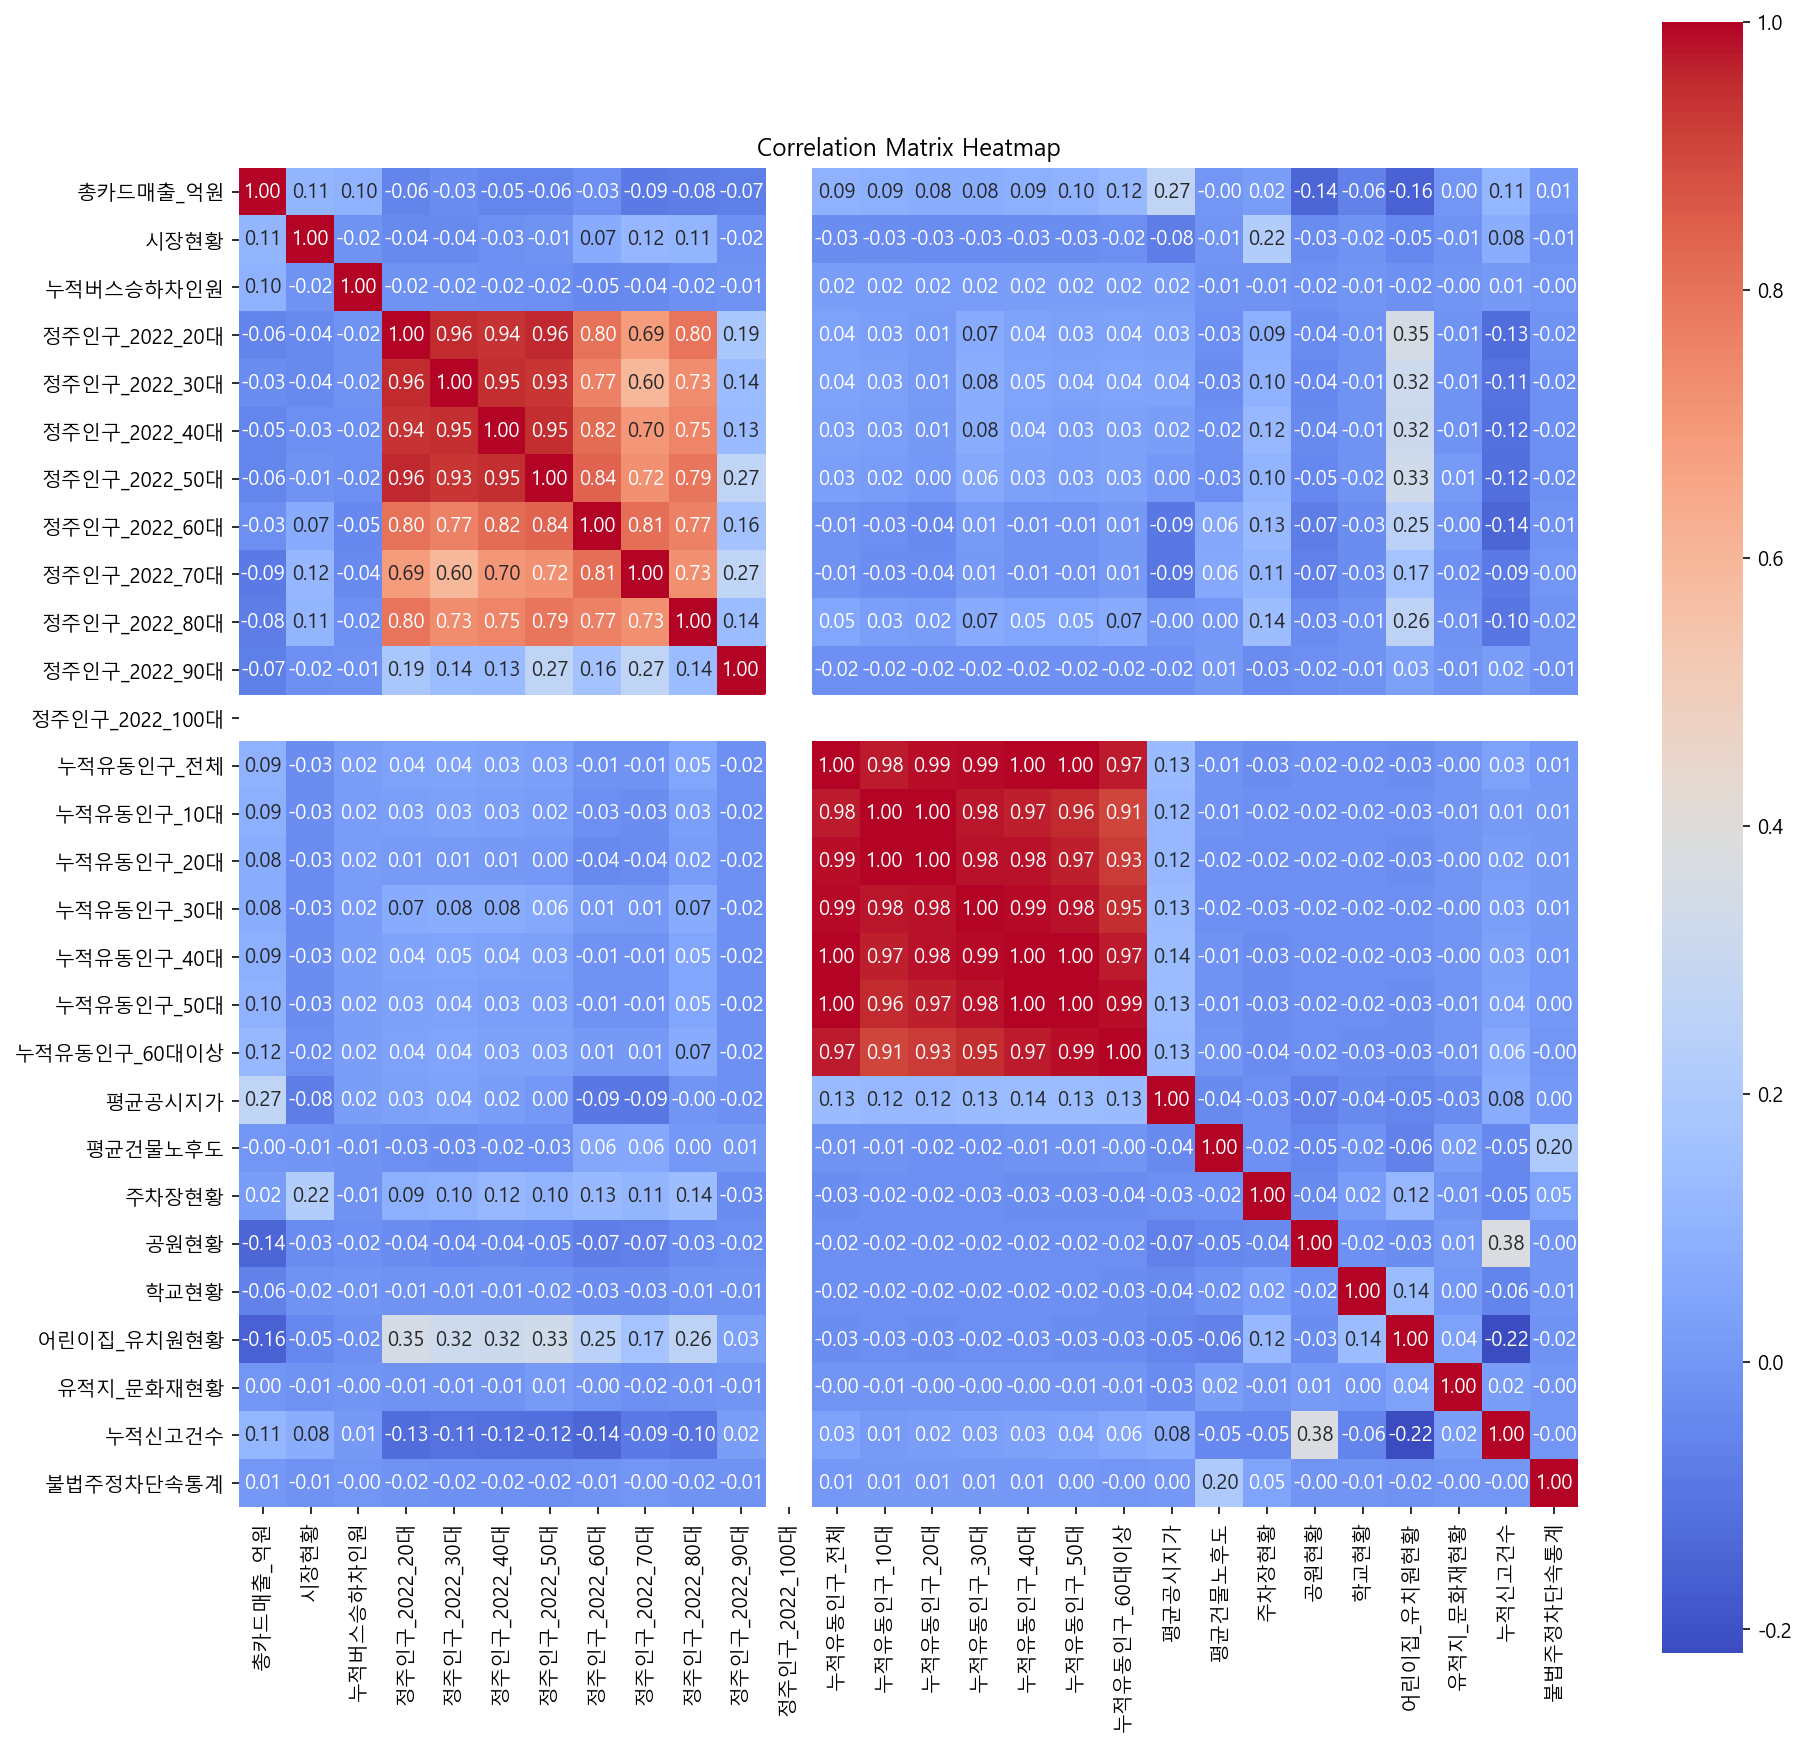

In [450]:
import seaborn as sns
import matplotlib.pyplot as plt

# 설명변수로 사용할 컬럼 선택
explanatory_variables = gdf_cox.iloc[:, 11:39]

# 상관계수 행렬 계산
corr_matrix = explanatory_variables.corr()

# 상관계수 히트맵 그리기
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [454]:
# 정주인구 컬럼들을 합산하여 '정주인구_2022' 컬럼 생성
gdf_cox['정주인구_2022'] = gdf_cox.iloc[:, 14:23].sum(axis=1)

# 불필요한 컬럼 삭제
gdf_cox = gdf_cox.drop(columns=gdf_cox.columns[24:30])
gdf_cox = gdf_cox.drop(columns=gdf_cox.columns[14:23])

gdf_cox.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   구분            2365 non-null   object  
 1   개방서비스명        2365 non-null   object  
 2   업태구분명         1976 non-null   object  
 3   인허가일자         2365 non-null   object  
 4   상세영업상태명       2365 non-null   object  
 5   폐업일자          1553 non-null   object  
 6   소재지전체주소       2343 non-null   object  
 7   도로명전체주소       1811 non-null   object  
 8   생존시간          2365 non-null   float64 
 9   사건발생          2365 non-null   int64   
 10  lisa_cluster  2278 non-null   object  
 11  총카드매출_억원      2111 non-null   float64 
 12  시장현황          2365 non-null   float64 
 13  누적버스승하차인원     2365 non-null   float64 
 14  누적유동인구_전체     2365 non-null   float64 
 15  평균공시지가        2361 non-null   float64 
 16  평균건물노후도       1206 non-null   float64 
 17  주차장현황         2365 non-null   float64 
 18  

In [456]:
# 컬럼순서 정렬
gdf_cox = gdf_cox[[
    # 상권정보
    '구분', '개방서비스명', '업태구분명', '인허가일자', '상세영업상태명', '폐업일자', '소재지전체주소', '도로명전체주소',
    
    # 생존정보
    '생존시간', '사건발생', 'lisa_cluster',
    
    # 경제활력
    '총카드매출_억원', '시장현황',
    
    # 접근성
    '누적버스승하차인원',
    
    # 인구특성
    '정주인구_2022',
    '누적유동인구_전체',
    
    # 지역특성
    '평균공시지가', '평균건물노후도', '주차장현황', '공원현황', '학교현황', '어린이집_유치원현황', '유적지_문화재현황',
    
    # 치안안전
    '누적신고건수', '불법주정차단속통계',
    
    # geometry
    'geometry']]

gdf_cox.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   구분            2365 non-null   object  
 1   개방서비스명        2365 non-null   object  
 2   업태구분명         1976 non-null   object  
 3   인허가일자         2365 non-null   object  
 4   상세영업상태명       2365 non-null   object  
 5   폐업일자          1553 non-null   object  
 6   소재지전체주소       2343 non-null   object  
 7   도로명전체주소       1811 non-null   object  
 8   생존시간          2365 non-null   float64 
 9   사건발생          2365 non-null   int64   
 10  lisa_cluster  2278 non-null   object  
 11  총카드매출_억원      2111 non-null   float64 
 12  시장현황          2365 non-null   float64 
 13  누적버스승하차인원     2365 non-null   float64 
 14  정주인구_2022     2365 non-null   float64 
 15  누적유동인구_전체     2365 non-null   float64 
 16  평균공시지가        2361 non-null   float64 
 17  평균건물노후도       1206 non-null   float64 
 18  

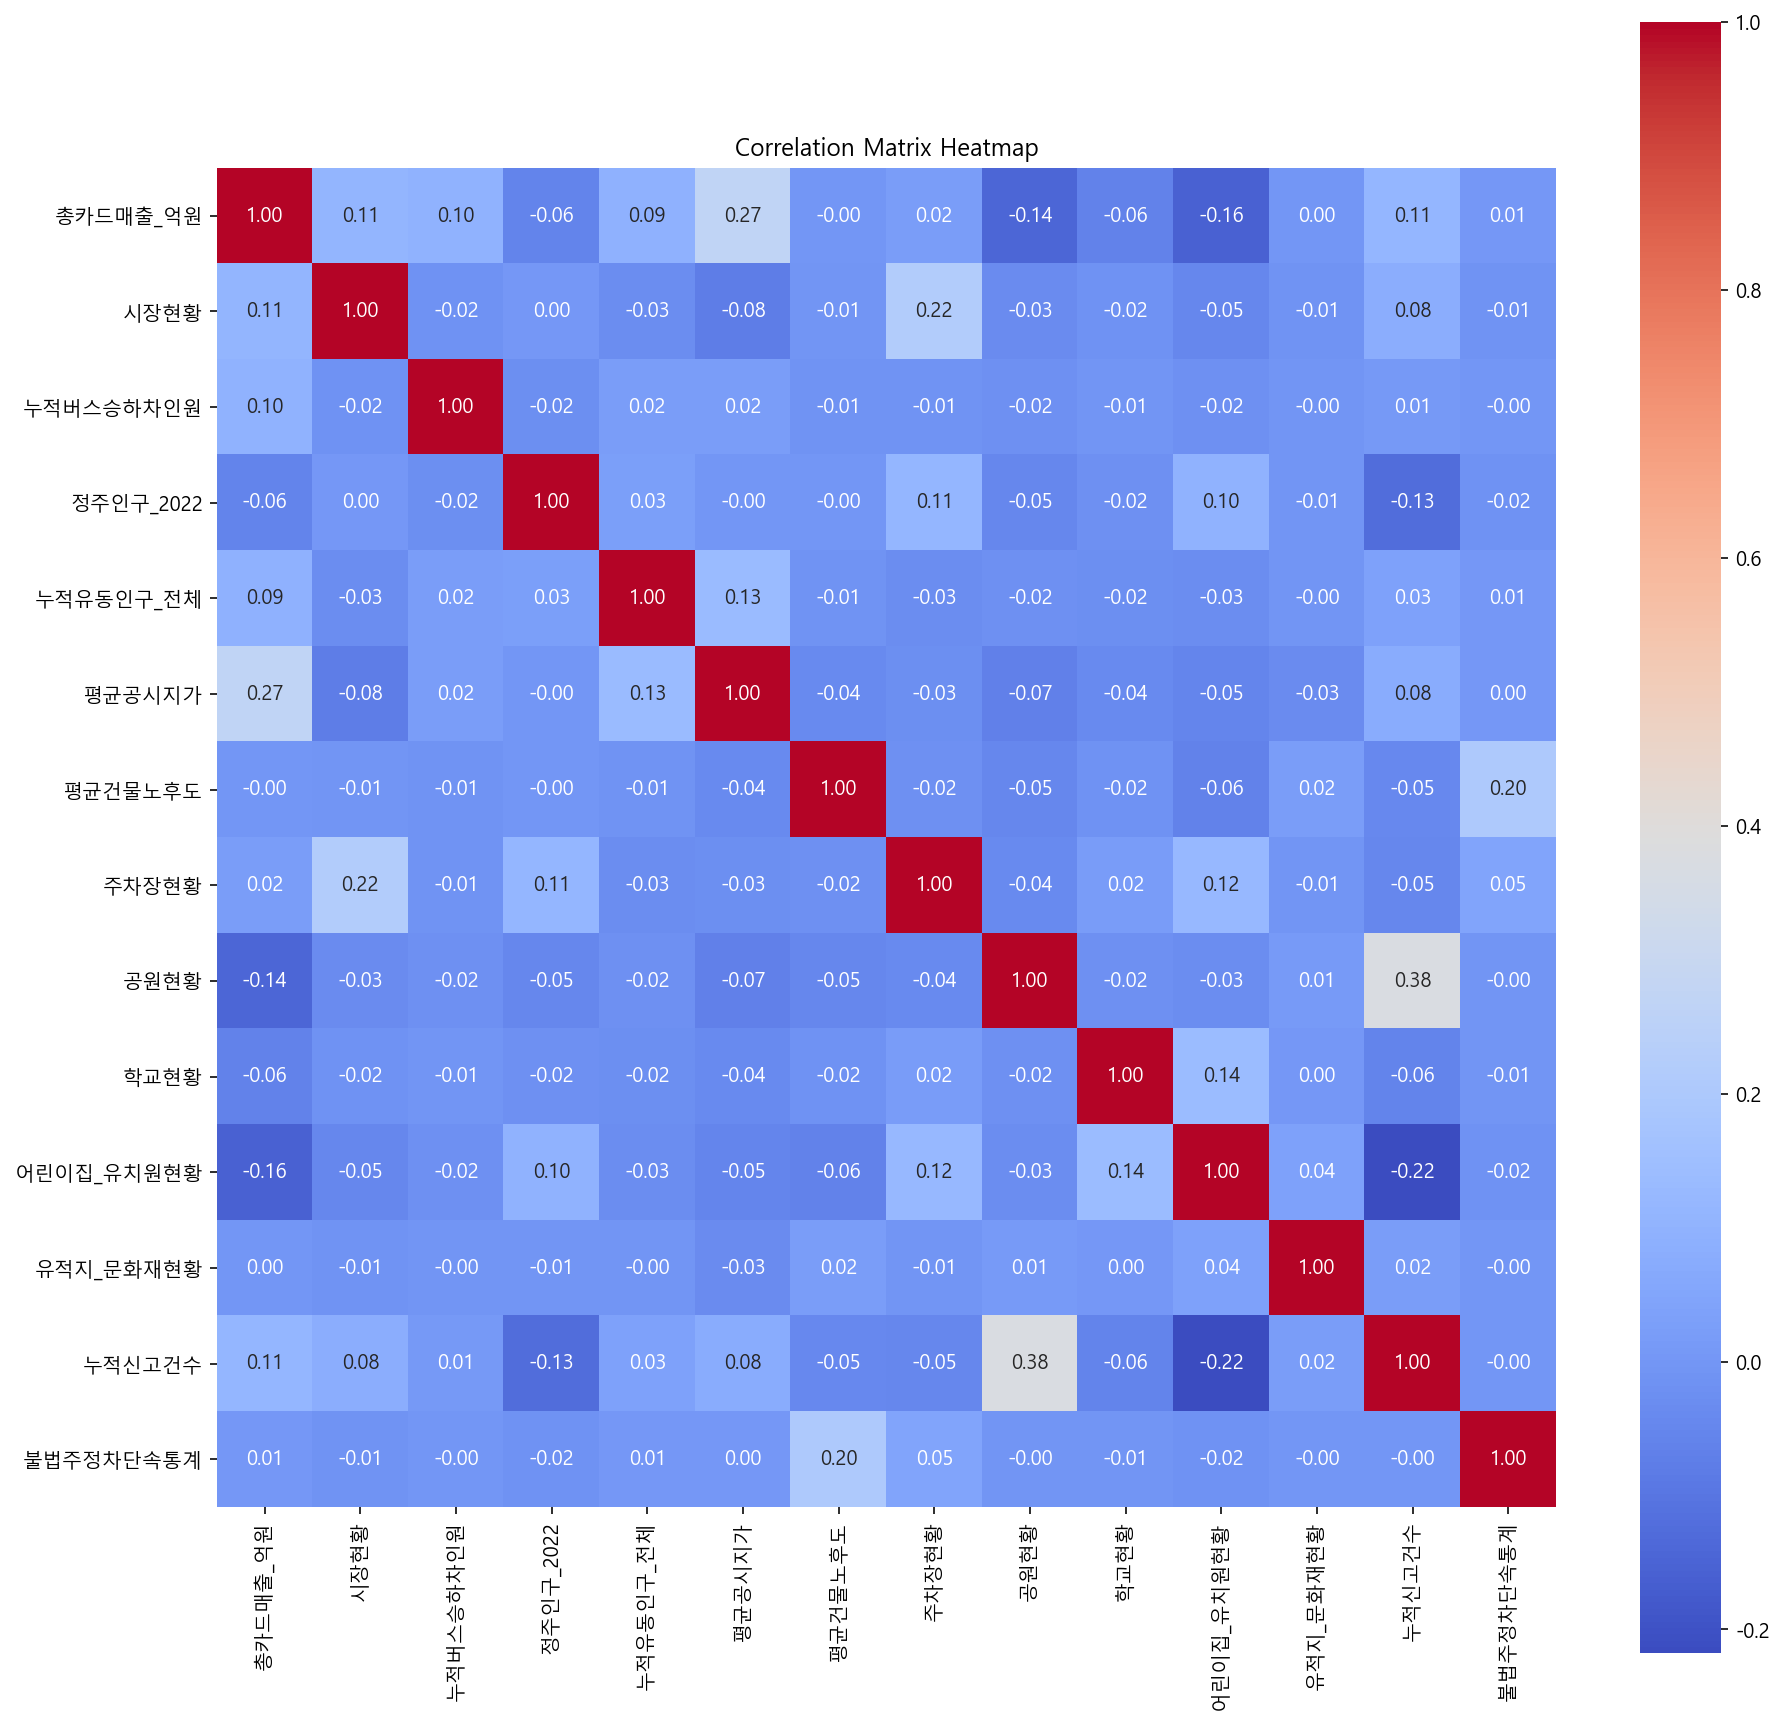

In [457]:
import seaborn as sns
import matplotlib.pyplot as plt

# 설명변수로 사용할 컬럼 선택
explanatory_variables = gdf_cox.iloc[:, 11:25]

# 상관계수 행렬 계산
corr_matrix = explanatory_variables.corr()

# 상관계수 히트맵 그리기
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [458]:
corr_matrix

,총카드매출_억원,시장현황,누적버스승하차인원,정주인구_2022,누적유동인구_전체,평균공시지가,평균건물노후도,주차장현황,공원현황,학교현황,어린이집_유치원현황,유적지_문화재현황,누적신고건수,불법주정차단속통계
총카드매출_억원,1.000000,0.107954,0.098278,-0.056066,0.094393,0.268723,-0.002928,0.022342,-0.142349,-0.063993,-0.157205,0.000808,0.113219,0.005402
시장현황,0.107954,1.000000,-0.016637,0.004209,-0.030168,-0.078478,-0.006763,0.215411,-0.033984,-0.015648,-0.046579,-0.008508,0.079885,-0.012384
누적버스승하차인원,0.098278,-0.016637,1.000000,-0.024960,0.021834,0.022306,-0.012419,-0.010599,-0.018094,-0.008086,-0.019748,-0.004837,0.009784,-0.002932
정주인구_2022,-0.056066,0.004209,-0.024960,1.000000,0.029749,-0.001654,-0.001971,0.111733,-0.049199,-0.020033,0.097955,-0.007628,-0.126418,-0.016388
누적유동인구_전체,0.094393,-0.030168,0.021834,0.029749,1.000000,0.132258,-0.012489,-0.028002,-0.022323,-0.022818,-0.028189,-0.004796,0.034810,0.005067
평균공시지가,0.268723,-0.078478,0.022306,-0.001654,0.132258,1.000000,-0.039179,-0.026347,-0.068263,-0.040629,-0.053486,-0.033410,0.075044,0.004204
평균건물노후도,-0.002928,-0.006763,-0.012419,-0.001971,-0.012489,-0.039179,1.000000,-0.020756,-0.050849,-0.016639,-0.064380,0.020395,-0.045733,0.201358
주차장현황,0.022342,0.215411,-0.010599,0.111733,-0.028002,-0.026347,-0.020756,1.000000,-0.037919,0.018695,0.120583,-0.005483,-0.049433,0.047067
공원현황,-0.142349,-0.033984,-0.018094,-0.049199,-0.022323,-0.068263,-0.050849,-0.037919,1.000000,-0.018199,-0.027930,0.013863,0.375337,-0.004394
학교현황,-0.063993,-0.015648,-0.008086,-0.020033,-0.022818,-0.040629,-0.016639,0.018695,-0.018199,1.000000,0.136628,0.002543,-0.057422,-0.006536


#### 2.3.5.4. 모형 분석

In [461]:
gdf_cox.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   구분            2365 non-null   object  
 1   개방서비스명        2365 non-null   object  
 2   업태구분명         1976 non-null   object  
 3   인허가일자         2365 non-null   object  
 4   상세영업상태명       2365 non-null   object  
 5   폐업일자          1553 non-null   object  
 6   소재지전체주소       2343 non-null   object  
 7   도로명전체주소       1811 non-null   object  
 8   생존시간          2365 non-null   float64 
 9   사건발생          2365 non-null   int64   
 10  lisa_cluster  2278 non-null   object  
 11  총카드매출_억원      2111 non-null   float64 
 12  시장현황          2365 non-null   float64 
 13  누적버스승하차인원     2365 non-null   float64 
 14  정주인구_2022     2365 non-null   float64 
 15  누적유동인구_전체     2365 non-null   float64 
 16  평균공시지가        2361 non-null   float64 
 17  평균건물노후도       1206 non-null   float64 
 18  

In [478]:
gdf_cox_2 = gdf_cox.drop(columns='평균건물노후도')
gdf_cox_2 = gdf_cox_2.drop(columns='유적지_문화재현황')
gdf_cox_2 = gdf_cox_2.drop(columns='공원현황')
# gdf_cox_2 = gdf_cox_2.drop(columns='불법주정차단속통계')
gdf_cox_2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   구분            2365 non-null   object  
 1   개방서비스명        2365 non-null   object  
 2   업태구분명         1976 non-null   object  
 3   인허가일자         2365 non-null   object  
 4   상세영업상태명       2365 non-null   object  
 5   폐업일자          1553 non-null   object  
 6   소재지전체주소       2343 non-null   object  
 7   도로명전체주소       1811 non-null   object  
 8   생존시간          2365 non-null   float64 
 9   사건발생          2365 non-null   int64   
 10  lisa_cluster  2278 non-null   object  
 11  총카드매출_억원      2111 non-null   float64 
 12  시장현황          2365 non-null   float64 
 13  누적버스승하차인원     2365 non-null   float64 
 14  정주인구_2022     2365 non-null   float64 
 15  누적유동인구_전체     2365 non-null   float64 
 16  평균공시지가        2361 non-null   float64 
 17  주차장현황         2365 non-null   float64 
 18  

In [479]:
from sklearn.preprocessing import StandardScaler
from lifelines import CoxPHFitter

# 변수 선택
X = gdf_cox_2.iloc[:, 11:22]  # 설명변수 선택
y = gdf_cox_2['사건발생']  # 이벤트 발생 여부
time = gdf_cox_2['생존시간']  # 시간 변수

# NaN 값을 가진 행을 제거
df_cox = X.join([time, y])
df_cox = df_cox.dropna()

# X와 y를 다시 정의
X = df_cox.iloc[:, :-2]
y = df_cox['사건발생']
time = df_cox['생존시간']

# 표준화를 위한 Scaler 생성
scaler = StandardScaler()

# 설명변수(X) 표준화 수행
X_scaled = scaler.fit_transform(X)

# 콕스비례위험모형 객체 생성
cph = CoxPHFitter()

# 모델 학습을 위한 DataFrame 구성
df_cox_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_cox_scaled['생존시간'] = time.values  # .values를 사용해 numpy 배열을 할당
df_cox_scaled['사건발생'] = y.values  # .values를 사용해 numpy 배열을 할당

# 모델 학습
cph.fit(df_cox_scaled, '생존시간', event_col='사건발생')

# 모델 요약 출력
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 2107 total observations, 737 right-censored observations>
             duration col = '생존시간'
                event col = '사건발생'
      baseline estimation = breslow
   number of observations = 2107
number of events observed = 1370
   partial log-likelihood = -9871.06
         time fit was run = 2023-11-09 05:44:25 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
총카드매출_억원    -0.05       0.95       0.03            -0.11             0.01                 0.90                 1.01
시장현황        -0.15       0.86       0.04            -0.22            -0.08                 0.80                 0.93
누적버스승하차인원   -0.03       0.97       0.03            -0.10             0.03                 0.91                 1.03
정주인구_2022   -0.06       0.94       0.04            -0.13             0.02                 0.88                 1.02
누적유동인구_전체   -0.00       1.00       0.03            -0.05             0.05                 0.95                 1.05
평균공시지가       0.13       1.14       0.03             0.08             0.18                 1.08                 1.20
주차장현황        0.13       1.14       0.02             0.10             0.16                 1.11                 1.18
학교현황        -0.05       0.95       0.05            -0.15             0.06                 0.86                 1.06
어린이집_유치원현황  -0.11       0.89       0.04            -0.19            -0.04                 0.83                 0.96
누적신고건수      -0.03       0.97       0.03            -0.09             0.02                 0.92                 1.02
불법주정차단속통계   -4.72       0.01       0.60            -5.89            -3.56                 0.00                 0.03

               z      p   -log2(p)
covariate                         
총카드매출_억원   -1.75   0.08       3.64
시장현황       -3.96 <0.005      13.70
누적버스승하차인원  -0.98   0.33       1.61
정주인구_2022  -1.46   0.14       2.81
누적유동인구_전체  -0.11   0.91       0.13
평균공시지가      5.14 <0.005      21.77
주차장현황       8.64 <0.005      57.29
학교현황       -0.88   0.38       1.40
어린이집_유치원현황 -2.92 <0.005       8.15
누적신고건수     -1.11   0.27       1.91
불법주정차단속통계  -7.93 <0.005      48.66
---
Concordance = 0.50
Partial AIC = 19764.13
log-likelihood ratio test = -762.84 on 11 df
-log2(p) of ll-ratio test = -0.00